In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [2]:
import re

In [178]:
url = 'https://www.basketball-reference.com/teams/GSW/2018.html'

In [179]:
res = requests.get(url)

In [180]:
res.status_code

200

In [181]:
soup = BeautifulSoup(res.content, 'lxml')

In [190]:
soup.find('div', {'table': 'sortable stats_table now_sortable'})

In [150]:
soup.find('div', {'id':'wrap'}).find('div', {'id': 'all_per_game'})

<div class="table_wrapper setup_commented commented" id="all_per_game">
<div class="section_heading">
<span class="section_anchor" data-label="Per Game" id="per_game_link"></span>
<h2>Per Game</h2> <div class="section_heading_text">
<ul>
</ul>
</div>
</div>
<div class="placeholder"></div>
<!--
   <div class="table_outer_container">
      <div class="overthrow table_container" id="div_per_game">
  <table class="sortable stats_table" id="per_game" data-cols-to-freeze=2><caption>Per Game Table</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>      
      <tr>
         <th aria-label="Rank" data-stat="ranker" scope="col" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-tip="Rank" >Rk</th>
         <th aria-label="&nbsp;" data-stat="player" scope="col" class=" poptip sort_default_asc center" >&nbsp;</th>
         <th aria-label="

In [197]:
soup.find('div', {'id': 'all_per_game'})

<div class="table_wrapper setup_commented commented" id="all_per_game">
<div class="section_heading">
<span class="section_anchor" data-label="Per Game" id="per_game_link"></span>
<h2>Per Game</h2> <div class="section_heading_text">
<ul>
</ul>
</div>
</div>
<div class="placeholder"></div>
<!--
   <div class="table_outer_container">
      <div class="overthrow table_container" id="div_per_game">
  <table class="sortable stats_table" id="per_game" data-cols-to-freeze=2><caption>Per Game Table</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>      
      <tr>
         <th aria-label="Rank" data-stat="ranker" scope="col" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-tip="Rank" >Rk</th>
         <th aria-label="&nbsp;" data-stat="player" scope="col" class=" poptip sort_default_asc center" >&nbsp;</th>
         <th aria-label="

In [222]:
soup.find('div', {'id': 'all_per_game'}).find_all(table)

[<div class="section_heading">
 <span class="section_anchor" data-label="Per Game" id="per_game_link"></span>
 <h2>Per Game</h2> <div class="section_heading_text">
 <ul>
 </ul>
 </div>
 </div>,
 <span class="section_anchor" data-label="Per Game" id="per_game_link"></span>,
 <h2>Per Game</h2>,
 <div class="section_heading_text">
 <ul>
 </ul>
 </div>,
 <ul>
 </ul>,
 <div class="placeholder"></div>]

In [163]:
ol = soup.find('div', {'id': 'all_per_game'})

In [226]:
ol

<div class="table_wrapper setup_commented commented" id="all_per_game">
<div class="section_heading">
<span class="section_anchor" data-label="Per Game" id="per_game_link"></span>
<h2>Per Game</h2> <div class="section_heading_text">
<ul>
</ul>
</div>
</div>
<div class="placeholder"></div>
<!--
   <div class="table_outer_container">
      <div class="overthrow table_container" id="div_per_game">
  <table class="sortable stats_table" id="per_game" data-cols-to-freeze=2><caption>Per Game Table</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>      
      <tr>
         <th aria-label="Rank" data-stat="ranker" scope="col" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-tip="Rank" >Rk</th>
         <th aria-label="&nbsp;" data-stat="player" scope="col" class=" poptip sort_default_asc center" >&nbsp;</th>
         <th aria-label="

In [ ]:
## needed to clean and get <!--|--> out of the way.

In [3]:
from bs4 import BeautifulSoup
import requests
comm = re.compile("<!--|-->")

html = requests.get("https://www.basketball-reference.com/teams/POR/2018.html").content.decode('utf-8')
cleaned_soup = BeautifulSoup(re.sub("<!--|-->","", html), 'lxml')

table = cleaned_soup.find('table', {'id': 'per_game'})

table = table.find('tbody')

In [280]:
table.find('tr').find('td')

<td class="left " csk="Thompson,Klay" data-append-csv="thompkl01" data-stat="player"><a href="/players/t/thompkl01.html">Klay Thompson</a></td>

In [393]:
table.find('tr').find_all('td')

[<td class="left " csk="Thompson,Klay" data-append-csv="thompkl01" data-stat="player"><a href="/players/t/thompkl01.html">Klay Thompson</a></td>,
 <td class="center " data-stat="age">27</td>,
 <td class="right " data-stat="g"><a href="/players/t/thompkl01/gamelog/2018/">73</a></td>,
 <td class="right " data-stat="gs">73</td>,
 <td class="right " data-stat="mp_per_g">34.3</td>,
 <td class="right " data-stat="fg_per_g">7.9</td>,
 <td class="right " data-stat="fga_per_g">16.2</td>,
 <td class="right " data-stat="fg_pct">.488</td>,
 <td class="right " data-stat="fg3_per_g">3.1</td>,
 <td class="right " data-stat="fg3a_per_g">7.1</td>,
 <td class="right " data-stat="fg3_pct">.440</td>,
 <td class="right " data-stat="fg2_per_g">4.7</td>,
 <td class="right " data-stat="fg2a_per_g">9.0</td>,
 <td class="right " data-stat="fg2_pct">.526</td>,
 <td class="right " data-stat="efg_pct">.585</td>,
 <td class="right " data-stat="ft_per_g">1.1</td>,
 <td class="right " data-stat="fta_per_g">1.3</td>,


In [ ]:
## east_teams = [TOR,BOS,PHI,NYK,BRK,CLE,IND,MIL,DET,CHI,MIA,WAS,CHO,ORL,ATL]

In [3]:
all_teams = ['POR','OKC','UTA','MIN','DEN','GSW','LAC','LAL','SAC','PHO','HOU','NOP','SAS','DAL','MEM',
             'TOR','BOS','PHI','NYK','BRK','CLE','IND','MIL','DET','CHI','MIA','WAS','CHO','ORL','ATL']

In [4]:
players = []
for team in all_teams:
    team_url = 'https://www.basketball-reference.com/teams/'+team+'/2018.html'
    res = requests.get(team_url).content.decode('utf-8')
    west_clean_soup = BeautifulSoup(re.sub("<!--|-->","",res), 'lxml')
    table = west_clean_soup.find('table', {'id': 'per_game'})
    table = table.find('tbody')
    
    for row in table.find_all('tr'):
        player = {}
        player['Name'] = row.find('td').text
        player['Age'] = row.find('td', {'class': 'center'}).text
        player['Games'] = row.find('td', {'class': 'right', 'data-stat': 'g'}).text
        player['GS'] = row.find('td', {'class': 'right', 'data-stat': 'gs'}).text
        player['MP'] = row.find('td', {'class': 'right', 'data-stat': 'mp_per_g'}).text
        player['FG'] = row.find('td', {'class': 'right', 'data-stat': 'fg_per_g'}).text
        player['FGA'] = row.find('td', {'class': 'right', 'data-stat': 'fga_per_g'}).text
        player['FG%'] = row.find('td', {'class': 'right', 'data-stat': 'fg_pct'}).text
        player['3P'] = row.find('td', {'class': 'right', 'data-stat': 'fg3_per_g'}).text
        player['3PA'] = row.find('td', {'class': 'right', 'data-stat': 'fg3a_per_g'}).text
        player['3P%'] = row.find('td', {'class': 'right', 'data-stat': 'fg3_pct'}).text
        player['2P'] = row.find('td', {'class': 'right', 'data-stat': 'fg2_per_g'}).text
        player['2PA'] = row.find('td', {'class': 'right', 'data-stat': 'fg2a_per_g'}).text
        player['2P%'] = row.find('td', {'class': 'right', 'data-stat': 'fg2_pct'}).text
        player['EFG%'] = row.find('td', {'class': 'right', 'data-stat': 'efg_pct'}).text
        player['FT'] = row.find('td', {'class': 'right', 'data-stat': 'ft_per_g'}).text
        player['FTA'] = row.find('td', {'class': 'right', 'data-stat': 'fta_per_g'}).text
        player['FT%'] = row.find('td', {'class': 'right', 'data-stat': 'ft_pct'}).text
        player['ORB'] = row.find('td', {'class': 'right', 'data-stat': 'orb_per_g'}).text
        player['DRB'] = row.find('td', {'class': 'right', 'data-stat': 'drb_per_g'}).text
        player['TRB'] = row.find('td', {'class': 'right', 'data-stat': 'trb_per_g'}).text
        player['AST'] = row.find('td', {'class': 'right', 'data-stat': 'ast_per_g'}).text
        player['STL'] = row.find('td', {'class': 'right', 'data-stat': 'stl_per_g'}).text
        player['BLK'] = row.find('td', {'class': 'right', 'data-stat': 'blk_per_g'}).text
        player['TOV'] = row.find('td', {'class': 'right', 'data-stat': 'tov_per_g'}).text
        player['PF'] = row.find('td', {'class': 'right', 'data-stat': 'pf_per_g'}).text
        player['PTS'] = row.find('td', {'class': 'right', 'data-stat': 'pts_per_g'}).text
        
        players.append(player)
pd.DataFrame(players)

2P    2P%   2PA   3P    3P%  3PA   AST Age  BLK  DRB  ...   GS Games  \
0    5.4   .501  10.8  3.1   .361  8.6   6.6  27  0.4  3.6  ...   73    73   
1    5.9   .465  12.7  2.3   .397  5.9   3.4  26  0.4  3.3  ...   81    81   
2    1.5   .432   3.5  1.8   .369  4.9   1.2  27  0.6  6.2  ...   67    69   
3    6.1   .508  11.9  0.0   .000  0.1   1.8  23  1.4  6.6  ...   79    79   
4    2.7   .485   5.6  0.5   .318  1.7   2.2  29  0.4  2.7  ...   40    79   
5    1.7   .547   3.0  0.8   .415  2.0   0.9  24  0.7  2.0  ...   36    59   
6    1.9   .450   4.2  1.1   .376  2.9   2.0  26  0.2  1.9  ...   10    74   
7    2.2   .584   3.7  0.0   .000  0.0   0.5  28  0.7  5.0  ...    0    78   
8    1.1   .506   2.2  0.9   .352  2.6   1.1  25  0.3  1.5  ...    5    82   
9    1.2   .455   2.7  0.5   .310  1.7   0.8  20  0.5  2.7  ...    1    66   
10   1.4   .500   2.7  0.1   .333  0.2   0.4  22  0.3  4.0  ...   12    33   
11   1.4   .625   2.3  0.6   .800  0.7   0.7  21  0.1  1.0  ...    0     7   
12   1.1   .673   1.6  0.3   .423  0.8   0.5  25  0.0  1.8  ...    2    33   
13   0.9   .442   1.9  0.0   .125  0.3   0.5  20  0.1  1.4  ...    3    27   
14   0.3   .370   0.8  0.1   .200  0.6   0.3  23  0.1  0.3  ...    1    35   
15   1.0  1.000   1.0  0.0         0.0   0.0  20  0.0  0.0  ...    0     1   
16   4.2   .454   9.3  3.1   .401  7.7   3.3  27  0.5  4.7  ...   79    79   
17   8.3   .485  17.0  1.2   .298  4.1  10.3  29  0.3  8.2  ...   80    80   
18   5.9   .631   9.3  0.0   .000  0.0   1.2  24  1.0  4.0  ...   76    76   
19   3.9   .437   8.9  2.2   .357  6.1   1.3  33  0.6  4.9  ...   78    78   
20   2.3   .532   4.3  1.3   .343  3.7   1.3  31  0.3  2.3  ...   16    18   
21   2.0   .627   3.2  0.2   .222  0.9   1.2  26  0.9  2.8  ...   39    39   
22   2.6   .613   4.3  0.4   .291  1.4   0.7  23  1.0  2.9  ...    1    81   
23   1.7   .444   3.9  1.0   .352  2.8   2.5  33  0.2  1.6  ...    2    82   
24   0.5   .421   1.2  0.8   .386  2.1   0.7  28  0.3  2.0  ...    3    82   
25   0.4   .443   0.9  1.1   .380  2.9   0.4  24  0.1  1.2  ...    8    75   
26   0.4   .403   1.0  0.5   .287  1.7   0.3  26  0.6  1.7  ...   10    69   
27   0.5   .612   0.8  0.7   .333  2.0   0.3  19  0.2  0.5  ...   12    61   
28   0.7   .564   1.3  0.0         0.0   0.3  22  0.3  0.6  ...    6    31   
29   0.9   .684   1.3  0.0         0.0   0.3  37  0.0  0.9  ...    0    15   
..   ...    ...   ...  ...    ...  ...   ...  ..  ...  ...  ...   ..   ...   
575  2.2   .521   4.3  0.0   .000  0.0   0.8  25  1.2  4.0  ...   25    82   
576  1.4   .400   3.4  0.8   .250  3.3   1.1  23  0.2  1.6  ...    2    16   
577  1.4   .488   2.8  0.1   .196  0.7   0.9  23  0.2  1.6  ...   12    62   
578  1.6   .540   3.0  0.0         0.0   0.8  25  0.5  2.6  ...    0    42   
579  1.0   .448   2.2  1.7   .369  4.5   0.8  30  0.4  2.2  ...    3    52   
580  0.7   .413   1.7  0.5   .386  1.3   0.6  32  0.2  1.2  ...    3    53   
581  1.0   .714   1.4  0.4   .667  0.6   0.0  26  0.0  1.4  ...    0     5   
582  0.2   .250   0.8  0.2   .500  0.4   0.0  21  0.0  0.6  ...    0     5   
583  6.3   .480  13.2  1.1   .290  3.9   6.2  24  0.1  2.4  ...   67    67   
584  2.9   .461   6.3  2.1   .385  5.6   2.6  23  0.5  4.1  ...   82    82   
585  2.7   .438   6.2  1.7   .394  4.2   3.5  28  0.7  3.4  ...   65    65   
586  3.1   .511   6.1  1.0   .250  4.0   1.9  25  0.1  4.0  ...   11    15   
587  2.7   .532   5.0  1.3   .359  3.7   1.1  30  0.4  3.8  ...   40    46   
588  3.2   .595   5.4  0.8   .355  2.3   1.5  28  0.8  6.3  ...   46    62   
589  4.0   .598   6.7  0.2   .340  0.6   1.3  20  1.1  4.9  ...   26    74   
590  2.1   .450   4.6  1.8   .372  4.8   2.0  31  0.1  1.7  ...    1    52   
591  1.5   .559   2.7  1.2   .371  3.2   1.0  26  0.5  3.3  ...    7    53   
592  1.2   .391   3.0  0.9   .371  2.3   3.0  28  0.1  1.7  ...    3    54   
593  1.6   .429   3.8  0.4   .367  1.2   1.9  23  0.5  2.5  ...    3    26   
594  2.1   .461   4.6  0.3  

In [ ]:
## EFG is taking in account that 3pt worth more than 2pt

In [5]:
pd.set_option('display.max_columns', 30)

In [6]:
pd.set_option('display.max_rows', 700)

In [7]:
season17_18 = pd.DataFrame(players)

In [42]:
season17_18.shape

(605, 26)

In [14]:
season17_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, Damian Lillard to Nicolas Brussino
Data columns (total 26 columns):
2P       605 non-null float64
2P%      605 non-null float64
2PA      605 non-null float64
3P       605 non-null float64
3P%      605 non-null float64
3PA      605 non-null float64
AST      605 non-null float64
Age      605 non-null float64
BLK      605 non-null float64
DRB      605 non-null float64
EFG%     605 non-null float64
FG       605 non-null float64
FG%      605 non-null float64
FGA      605 non-null float64
FT       605 non-null float64
FT%      605 non-null float64
FTA      605 non-null float64
GS       605 non-null float64
Games    605 non-null float64
MP       605 non-null float64
ORB      605 non-null float64
PF       605 non-null float64
PTS      605 non-null float64
STL      605 non-null float64
TOV      605 non-null float64
TRB      605 non-null float64
dtypes: float64(26)
memory usage: 127.6+ KB


In [14]:
season17_18

2P    2P%   2PA   3P    3P%   3PA   AST Age  BLK   DRB   EFG%    FG  \
0    5.4   .501  10.8  3.1   .361   8.6   6.6  27  0.4   3.6   .519   8.5   
1    5.9   .465  12.7  2.3   .397   5.9   3.4  26  0.4   3.3   .506   8.2   
2    1.5   .432   3.5  1.8   .369   4.9   1.2  27  0.6   6.2   .503   3.3   
3    6.1   .508  11.9  0.0   .000   0.1   1.8  23  1.4   6.6   .505   6.1   
4    2.7   .485   5.6  0.5   .318   1.7   2.2  29  0.4   2.7   .484   3.3   
5    1.7   .547   3.0  0.8   .415   2.0   0.9  24  0.7   2.0   .577   2.5   
6    1.9   .450   4.2  1.1   .376   2.9   2.0  26  0.2   1.9   .497   3.0   
7    2.2   .584   3.7  0.0   .000   0.0   0.5  28  0.7   5.0   .582   2.2   
8    1.1   .506   2.2  0.9   .352   2.6   1.1  25  0.3   1.5   .518   2.0   
9    1.2   .455   2.7  0.5   .310   1.7   0.8  20  0.5   2.7   .458   1.7   
10   1.4   .500   2.7  0.1   .333   0.2   0.4  22  0.3   4.0   .500   1.4   
11   1.4   .625   2.3  0.6   .800   0.7   0.7  21  0.1   1.0   .762   2.0   
12   1.1   .673   1.6  0.3   .423   0.8   0.5  25  0.0   1.8   .660   1.4   
13   0.9   .442   1.9  0.0   .125   0.3   0.5  20  0.1   1.4   .408   0.9   
14   0.3   .370   0.8  0.1   .200   0.6   0.3  23  0.1   0.3   .340   0.4   
15   1.0  1.000   1.0  0.0          0.0   0.0  20  0.0   0.0  1.000   1.0   
16   4.2   .454   9.3  3.1   .401   7.7   3.3  27  0.5   4.7   .521   7.3   
17   8.3   .485  17.0  1.2   .298   4.1  10.3  29  0.3   8.2   .477   9.5   
18   5.9   .631   9.3  0.0   .000   0.0   1.2  24  1.0   4.0   .629   5.9   
19   3.9   .437   8.9  2.2   .357   6.1   1.3  33  0.6   4.9   .476   6.1   
20   2.3   .532   4.3  1.3   .343   3.7   1.3  31  0.3   2.3   .524   3.6   
21   2.0   .627   3.2  0.2   .222   0.9   1.2  26  0.9   2.8   .562   2.2   
22   2.6   .613   4.3  0.4   .291   1.4   0.7  23  1.0   2.9   .570   3.0   
23   1.7   .444   3.9  1.0   .352   2.8   2.5  33  0.2   1.6   .479   2.7   
24   0.5   .421   1.2  0.8   .386   2.1   0.7  28  0.3   2.0   .523   1.3   
25   0.4   .443   0.9  1.1   .380   2.9   0.4  24  0.1   1.2   .540   1.5   
26   0.4   .403   1.0  0.5   .287   1.7   0.3  26  0.6   1.7   .420   0.9   
27   0.5   .612   0.8  0.7   .333   2.0   0.3  19  0.2   0.5   .533   1.1   
28   0.7   .564   1.3  0.0          0.0   0.3  22  0.3   0.6   .564   0.7   
29   0.9   .684   1.3  0.0          0.0   0.3  37  0.0   0.9   .684   0.9   
30   0.4   .313   1.3  0.2   .400   0.4   0.2  29  0.0   0.8   .381   0.6   
31   0.5   .500   1.0  0.3   .400   0.8   1.3  22  0.0   0.8   .545   0.8   
32   0.5   .500   1.0  0.0          0.0   0.0  21  0.0   0.5   .500   0.5   
33   5.2   .502  10.3  2.4   .340   7.0   3.7  21  0.3   3.1   .506   7.5   
34   4.9   .622   7.9  0.0          0.0   1.4  25  2.3   7.8   .622   4.9   
35   1.6   .516   3.1  2.5   .440   5.7   4.8  30  0.2   3.9   .609   4.1   
36   3.2   .451   7.2  1.2   .352   3.5   5.3  27  0.1   4.0   .476   4.5   
37   4.9   .596   8.3  0.2   .222   0.8   1.3  26  1.1   4.6   .573   5.1   
38   3.4   .455   7.4  2.6   .389   6.7   1.7  25  0.2   2.5   .516   6.0   
39   2.4   .462   5.3  1.8   .316   5.6   1.5  27  0.3   3.1   .468   4.2   
40   2.3   .507   4.4  0.7   .274   2.6   1.4  36  0.2   3.0   .471   3.0   
41   2.3   .551   4.1  0.8   .381   2.2   0.9  33  0.3   3.5   .558   3.1   
42   2.6   .536   4.9  0.4   .278   1.3   3.1  22  0.2   1.6   .511   3.0   
43   1.1   .470   2.4  0.6   .356   1.7   1.4  24  0.2   3.1   .496   1.7   
44   1.9   .452   4.3  0.7   .331   2.2   1.0  26  0.1   2.7   .467   2.7   
45   1.3   .511   2.5  0.9   .414   2.1   0.6  30  0.2   2.6   .562   2.1   
46   1.0   .504   1.9  0.0   .000   0.0   0.8  30  1.2   1.3   .500   1.0   
47   1.2   .481   2.5  0.5   .404   1.1   1.8  25  0.1   1.0   .520   1.7   
48   0.2   .167   1.2  0.0          0.0   0.2  26  0.0   0.2   .167   0.2   
49   0.4   .571   0.8  0.0   .000   0.4   0.3  24  0.0   0.7   .364   0.4   
50   0.3   .300   1.1  0.0   .000   0.1   0.1  20  0.0   0.8   .273   0.3   
51

In [8]:
season17_18.set_index('Name', inplace=True)

In [ ]:
## need to change them to not be strings.

In [9]:
season17_18 = season17_18.replace('', np.nan)

In [10]:
season17_18['2P'] = season17_18['2P'].astype(float)
season17_18['2P%'] = season17_18['2P%'].astype(float)
season17_18['2PA'] = season17_18['2PA'].astype(float)
season17_18['3P'] = season17_18['3P'].astype(float)
season17_18['3P%'] = season17_18['3P%'].astype(float)
season17_18['3PA'] = season17_18['3PA'].astype(float)
season17_18['AST'] = season17_18['AST'].astype(float)
season17_18['Age'] = season17_18['Age'].astype(float)
season17_18['BLK'] = season17_18['BLK'].astype(float)
season17_18['DRB'] = season17_18['DRB'].astype(float)
season17_18['EFG%'] = season17_18['EFG%'].astype(float)
season17_18['FG'] = season17_18['FG'].astype(float)
season17_18['FG%'] = season17_18['FG%'].astype(float)
season17_18['FGA'] = season17_18['FGA'].astype(float)
season17_18['FT'] = season17_18['FT'].astype(float)
season17_18['FT%'] = season17_18['FT%'].astype(float)
season17_18['FTA'] = season17_18['FTA'].astype(float)
season17_18['GS'] = season17_18['GS'].astype(float)
season17_18['Games'] = season17_18['Games'].astype(float)
season17_18['MP'] = season17_18['MP'].astype(float)
season17_18['ORB'] = season17_18['ORB'].astype(float)
season17_18['PF'] = season17_18['PF'].astype(float)
season17_18['PTS'] = season17_18['PTS'].astype(float)
season17_18['STL'] = season17_18['STL'].astype(float)
season17_18['TOV'] = season17_18['TOV'].astype(float)
season17_18['TRB'] = season17_18['TRB'].astype(float)

In [11]:
season17_18

2P    2P%   2PA   3P    3P%   3PA   AST   Age  BLK  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  27.0  0.4   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  26.0  0.4   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  27.0  0.6   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  23.0  1.4   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  29.0  0.4   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  24.0  0.7   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  26.0  0.2   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  28.0  0.7   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  25.0  0.3   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  20.0  0.5   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  22.0  0.3   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  21.0  0.1   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  25.0  0.0   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  20.0  0.1   
Jake Layman               0.3  0.370   0.8  0.1  0.200   0.6   0.3  23.0  0.1   
Georgios Papagiannis      1.0  1.000   1.0  0.0    NaN   0.0   0.0  20.0  0.0   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  27.0  0.5   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  29.0  0.3   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  24.0  1.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  33.0  0.6   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  31.0  0.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  26.0  0.9   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  23.0  1.0   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  33.0  0.2   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  28.0  0.3   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  24.0  0.1   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  26.0  0.6   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  19.0  0.2   
Dakari Johnson            0.7  0.564   1.3  0.0    NaN   0.0   0.3  22.0  0.3   
Nick Collison             0.9  0.684   1.3  0.0    NaN   0.0   0.3  37.0  0.0   
Kyle Singler              0.4  0.313   1.3  0.2  0.400   0.4   0.2  29.0  0.0   
Daniel Hamilton           0.5  0.500   1.0  0.3  0.400   0.8   1.3  22.0  0.0   
PJ Dozier                 0.5  0.500   1.0  0.0    NaN   0.0   0.0  21.0  0.0   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  21.0  0.3   
Rudy Gobert               4.9  0.622   7.9  0.0    NaN   0.0   1.4  25.0  2.3   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  30.0  0.2   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  27.0  0.1   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  26.0  1.1   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  25.0  0.2   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  27.0  0.3   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  36.0  0.2   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  33.0  0.3   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  22.0  0.2   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  24.0  0.2   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  26.0  0.1   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  30.0  0.2   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  30.0  1.2   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1

In [37]:
season17_18[season17_18['2P%']== np.nan]

Empty DataFrame
Columns: [2P, 2P%, 2PA, 3P, 3P%, 3PA, AST, Age, BLK, DRB, EFG%, FG, FG%, FGA, FT, FT%, FTA, GS, Games, MP, ORB, PF, PTS, STL, TOV, TRB]
Index: []

In [ ]:
## changing nan to 0

In [12]:
season17_18.replace(np.nan, 0, inplace =True)

In [15]:
season17_18.isnull().sum()

2P       0
2P%      0
2PA      0
3P       0
3P%      0
3PA      0
AST      0
Age      0
BLK      0
DRB      0
EFG%     0
FG       0
FG%      0
FGA      0
FT       0
FT%      0
FTA      0
GS       0
Games    0
MP       0
ORB      0
PF       0
PTS      0
STL      0
TOV      0
TRB      0
dtype: int64

In [45]:
season17_18.corr()

2P       2P%       2PA        3P       3P%       3PA       AST  \
2P     1.000000  0.275356  0.982518  0.342309  0.117131  0.353833  0.617440   
2P%    0.275356  1.000000  0.182503 -0.002352 -0.099059  0.002573  0.056656   
2PA    0.982518  0.182503  1.000000  0.388944  0.146599  0.407506  0.662384   
3P     0.342309 -0.002352  0.388944  1.000000  0.534470  0.974690  0.503526   
3P%    0.117131 -0.099059  0.146599  0.534470  1.000000  0.456790  0.231501   
3PA    0.353833  0.002573  0.407506  0.974690  0.456790  1.000000  0.529495   
AST    0.617440  0.056656  0.662384  0.503526  0.231501  0.529495  1.000000   
Age    0.041087  0.036892  0.031949  0.150860  0.043754  0.136249  0.124602   
BLK    0.566993  0.238406  0.516479  0.059198 -0.004896  0.051734  0.178748   
DRB    0.753679  0.239972  0.717467  0.305600  0.091619  0.308216  0.422585   
EFG%   0.205488  0.476894  0.134206  0.200638  0.439788  0.094279  0.060630   
FG     0.937653  0.223211  0.940813  0.646954  0.292853  0.647169  0.687171   
FG%    0.319878  0.650145  0.229134 -0.004766  0.188737 -0.093615  0.049952   
FGA    0.876201  0.135383  0.912796  0.720079  0.311106  0.744820  0.720522   
FT     0.807442  0.127908  0.825095  0.512872  0.203185  0.527142  0.646385   
FT%    0.323564  0.208551  0.340366  0.396034  0.341594  0.394247  0.327215   
FTA    0.839099  0.147324  0.849931  0.447601  0.160520  0.465898  0.638645   
GS     0.692691  0.149765  0.682467  0.469446  0.180417  0.464377  0.527158   
Games  0.499273  0.235910  0.475584  0.390897  0.246610  0.376457  0.386785   
MP     0.790373  0.187319  0.811561  0.671840  0.318343  0.688709  0.690386   
ORB    0.586997  0.288020  0.517199 -0.121251 -0.155274 -0.135223  0.090081   
PF     0.624912  0.231293  0.622304  0.331901  0.152110  0.344090  0.434080   
PTS    0.895960  0.189159  0.908156  0.709936  0.325402  0.710057  0.701644   
STL    0.584021  0.136139  0.604745  0.477711  0.191355  0.498067  0.648683   
TOV    0.790033  0.121545  0.824193  0.499817  0.193938  0.523358  0.832989   
TRB    0.747109  0.268186  0.698965  0.195597  0.022723  0.193323  0.347614   

            Age       BLK       DRB      EFG%        FG       FG%       FGA  \
2P     0.041087  0.566993  0.753679  0.205488  0.937653  0.319878  0.876201   
2P%    0.036892  0.238406  0.239972  0.476894  0.223211  0.650145  0.135383   
2PA    0.031949  0.516479  0.717467  0.134206  0.940813  0.229134  0.912796   
3P     0.150860  0.059198  0.305600  0.200638  0.646954 -0.004766  0.720079   
3P%    0.043754 -0.004896  0.091619  0.439788  0.292853  0.188737  0.311106   
3PA    0.136249  0.051734  0.308216  0.094279  0.647169 -0.093615  0.744820   
AST    0.124602  0.178748  0.422585  0.060630  0.687171  0.049952  0.720522   
Age    1.000000  0.014867  0.061613  0.068167  0.088975  0.044574  0.084063   
BLK    0.014867  1.000000  0.685376  0.192128  0.481820  0.299985  0.400314   
DRB    0.061613  0.685376  1.000000  0.199735  0.724254  0.276290  0.661858   
EFG%   0.068167  0.192128  0.199735  1.000000  0.241155  0.927371  0.140672   
FG     0.088975  0.481820  0.724254  0.241155  1.000000  0.258071  0.976915   
FG%    0.044574  0.299985  0.276290  0.927371  0.258071  1.000000  0.126128   
FGA    0.084063  0.400314  0.661858  0.140672  0.976915  0.126128  1.000000   
FT     0.068782  0.436469  0.615706  0.122162  0.844552  0.151235  0.838605   
FT%    0.121926  0.172158  0.281534  0.179491  0.408780  0.140050  0.424871   
FTA    0.046300  0.495706  0.668535  0.126568  0.846122  0.178870  0.829390   
GS     0.071841  0.459210  0.667736  0.158394  0.735994  0.169621  0.706417   
Games  0.080448  0.388125  0.542359  0.237044  0.549542  0.237718  0.515828   
MP     0.136280  0.458214  0.720927  0.190210  0.889435  0.175263  0.900994   
ORB    0.000022  0.632745  0.736705  0.214860  0.431147  0.385845  0.317708   
PF     0.060308  0.536259  0.674248  0.207335  0.628830  0.263723  0.608480   
PTS    0.098773  0.450026  0.696005  0.227210  0.989291  0.218

In [28]:
season17_18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, Damian Lillard to Nicolas Brussino
Data columns (total 26 columns):
2P       605 non-null float64
2P%      588 non-null float64
2PA      605 non-null float64
3P       605 non-null float64
3P%      545 non-null float64
3PA      605 non-null float64
AST      605 non-null float64
Age      605 non-null float64
BLK      605 non-null float64
DRB      605 non-null float64
EFG%     601 non-null float64
FG       605 non-null float64
FG%      601 non-null float64
FGA      605 non-null float64
FT       605 non-null float64
FT%      550 non-null float64
FTA      605 non-null float64
GS       605 non-null float64
Games    605 non-null float64
MP       605 non-null float64
ORB      605 non-null float64
PF       605 non-null float64
PTS      605 non-null float64
STL      605 non-null float64
TOV      605 non-null float64
TRB      605 non-null float64
dtypes: float64(26)
memory usage: 147.6+ KB


In [46]:
season17_18.to_csv('./season17_18')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
from sklearn.cluster import KMeans

In [18]:
season17_18.head()

2P    2P%   2PA   3P    3P%  3PA  AST   Age  BLK  DRB  \
Name                                                                      
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  27.0  0.4  3.6   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  26.0  0.4  3.3   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  27.0  0.6  6.2   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  23.0  1.4  6.6   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  29.0  0.4  2.7   

                  EFG%   FG    FG%   FGA   FT    FT%  FTA    GS  Games    MP  \
Name                                                                           
Damian Lillard   0.519  8.5  0.439  19.4  6.8  0.916  7.4  73.0   73.0  36.6   
CJ McCollum      0.506  8.2  0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1   
Al-Farouq Aminu  0.503  3.3  0.395   8.4  0.9  0.738  1.2  67.0   69.0  30.0   
Jusuf Nurkic     0.505  6.1  0.505  12.0  2.2  0.630  3.5  79.0   79.0  26.4   
Evan Turner      0.484  3.3  0.447   7.3  1.2  0.850  1.4  40.0   79.0  25.7   

                 ORB   PF   PTS  STL  TOV  TRB  
Name                                            
Damian Lillard   0.8  1.6  26.9  1.1  2.8  4.5  
CJ McCollum      0.7  2.1  21.4  1.0  1.9  4.0  
Al-Farouq Aminu  1.4  2.0   9.3  1.1  1.1  7.6  
Jusuf Nurkic     2.4  3.1  14.3  0.8  2.3  9.0  
Evan Turner      0.4  2.1   8.2  0.6  1.3  3.1

In [ ]:
## df.drop(columns=['B', 'C'])

In [52]:
## drop age cause age shouldn't matter

In [19]:
season17_18.drop(columns=['Age'])

2P    2P%   2PA   3P    3P%   3PA   AST  BLK   DRB  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  0.4   3.6   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  0.4   3.3   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  0.6   6.2   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  1.4   6.6   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  0.4   2.7   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  0.7   2.0   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  0.2   1.9   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  0.7   5.0   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  0.3   1.5   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  0.5   2.7   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  0.3   4.0   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  0.1   1.0   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  0.0   1.8   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  0.1   1.4   
Jake Layman               0.3  0.370   0.8  0.1  0.200   0.6   0.3  0.1   0.3   
Georgios Papagiannis      1.0  1.000   1.0  0.0  0.000   0.0   0.0  0.0   0.0   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  0.5   4.7   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  0.3   8.2   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  1.0   4.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  0.6   4.9   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  0.3   2.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  0.9   2.8   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  1.0   2.9   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  0.2   1.6   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  0.3   2.0   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  0.1   1.2   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  0.6   1.7   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  0.2   0.5   
Dakari Johnson            0.7  0.564   1.3  0.0  0.000   0.0   0.3  0.3   0.6   
Nick Collison             0.9  0.684   1.3  0.0  0.000   0.0   0.3  0.0   0.9   
Kyle Singler              0.4  0.313   1.3  0.2  0.400   0.4   0.2  0.0   0.8   
Daniel Hamilton           0.5  0.500   1.0  0.3  0.400   0.8   1.3  0.0   0.8   
PJ Dozier                 0.5  0.500   1.0  0.0  0.000   0.0   0.0  0.0   0.5   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  0.3   3.1   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  2.3   7.8   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  0.2   3.9   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  0.1   4.0   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  1.1   4.6   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  0.2   2.5   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  0.3   3.1   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  0.2   3.0   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  0.3   3.5   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  0.2   1.6   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  0.2   3.1   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  0.1   2.7   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  0.2   2.6   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  1.2   1.3   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1

In [90]:
X=season17_18.drop(columns=['Age'])
kmeans= KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
kmeans.labels_

array([5, 5, 0, 5, 7, 7, 6, 6, 6, 6, 8, 1, 8, 8, 8, 1, 5, 5, 5, 5, 3, 2, 6,
       6, 6, 6, 6, 4, 8, 1, 1, 1, 1, 5, 0, 5, 5, 5, 3, 3, 8, 8, 1, 6, 4, 6,
       4, 4, 1, 1, 1, 1, 1, 1, 0, 5, 5, 5, 5, 6, 7, 6, 6, 1, 8, 8, 4, 1, 1,
       8, 0, 7, 5, 5, 5, 2, 8, 7, 6, 4, 8, 8, 8, 4, 1, 8, 8, 1, 5, 5, 5, 2,
       6, 3, 6, 4, 6, 4, 0, 4, 6, 6, 6, 1, 1, 2, 2, 0, 7, 3, 5, 3, 3, 3, 2,
       7, 8, 3, 6, 4, 6, 6, 8, 1, 8, 1, 2, 0, 5, 3, 7, 3, 0, 4, 5, 7, 4, 1,
       8, 8, 1, 4, 4, 1, 4, 8, 1, 1, 1, 1, 0, 0, 0, 2, 0, 6, 7, 7, 1, 7, 6,
       4, 4, 8, 8, 1, 1, 1, 0, 0, 3, 3, 7, 7, 2, 7, 3, 3, 0, 3, 6, 6, 8, 1,
       8, 4, 1, 8, 8, 1, 5, 3, 0, 0, 7, 7, 5, 0, 4, 4, 1, 8, 1, 4, 4, 1, 1,
       1, 1, 8, 1, 1, 1, 1, 5, 2, 5, 5, 3, 0, 6, 4, 4, 6, 1, 8, 8, 4, 1, 8,
       1, 1, 1, 1, 1, 1, 1, 5, 0, 7, 0, 0, 3, 4, 7, 6, 4, 6, 6, 4, 4, 1, 1,
       1, 5, 0, 5, 7, 3, 5, 6, 3, 3, 7, 4, 7, 1, 8, 8, 1, 4, 1, 1, 1, 1, 1,
       1, 5, 3, 2, 5, 0, 3, 1, 1, 2, 1, 4, 7, 6, 8, 8, 4, 8, 8, 1, 4, 8, 8,
       1, 1,

In [28]:
kmeans.cluster_centers_

array([[  3.70816327,   0.50559184,   7.32040816,   1.27959184,
          0.34577551,   3.53469388,   2.95714286,   0.56530612,
          4.17142857,   0.52153061,   4.98979592,   0.46126531,
         10.84489796,   2.18979592,   0.77297959,   2.7877551 ,
         58.75510204,  65.69387755,  28.74897959,   1.11428571,
          2.14897959,  13.44693878,   0.93877551,   1.68367347,
          5.28163265],
       [  0.73049645,   0.40743262,   1.61914894,   0.24042553,
          0.18897872,   0.84255319,   0.64964539,   0.1177305 ,
          0.9893617 ,   0.42879433,   0.97304965,   0.37991489,
          2.45815603,   0.35744681,   0.42475177,   0.53262411,
          0.28368794,   6.85815603,   8.23546099,   0.34609929,
          0.85106383,   2.54326241,   0.26453901,   0.46241135,
          1.33120567],
       [  3.81538462,   0.50188462,   7.74230769,   1.50769231,
          0.34538462,   4.12692308,   3.73461538,   0.56538462,
          3.95384615,   0.51826923,   5.32307692,   0.4573

In [29]:
 #X['Kmean clusters']= kmeans.labels_

In [31]:
X

2P    2P%   2PA   3P    3P%   3PA   AST  BLK   DRB  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  0.4   3.6   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  0.4   3.3   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  0.6   6.2   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  1.4   6.6   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  0.4   2.7   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  0.7   2.0   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  0.2   1.9   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  0.7   5.0   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  0.3   1.5   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  0.5   2.7   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  0.3   4.0   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  0.1   1.0   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  0.0   1.8   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  0.1   1.4   
Jake Layman               0.3  0.370   0.8  0.1  0.200   0.6   0.3  0.1   0.3   
Georgios Papagiannis      1.0  1.000   1.0  0.0  0.000   0.0   0.0  0.0   0.0   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  0.5   4.7   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  0.3   8.2   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  1.0   4.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  0.6   4.9   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  0.3   2.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  0.9   2.8   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  1.0   2.9   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  0.2   1.6   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  0.3   2.0   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  0.1   1.2   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  0.6   1.7   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  0.2   0.5   
Dakari Johnson            0.7  0.564   1.3  0.0  0.000   0.0   0.3  0.3   0.6   
Nick Collison             0.9  0.684   1.3  0.0  0.000   0.0   0.3  0.0   0.9   
Kyle Singler              0.4  0.313   1.3  0.2  0.400   0.4   0.2  0.0   0.8   
Daniel Hamilton           0.5  0.500   1.0  0.3  0.400   0.8   1.3  0.0   0.8   
PJ Dozier                 0.5  0.500   1.0  0.0  0.000   0.0   0.0  0.0   0.5   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  0.3   3.1   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  2.3   7.8   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  0.2   3.9   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  0.1   4.0   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  1.1   4.6   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  0.2   2.5   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  0.3   3.1   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  0.2   3.0   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  0.3   3.5   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  0.2   1.6   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  0.2   3.1   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  0.1   2.7   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  0.2   2.6   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  1.2   1.3   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1

In [ ]:
## not what i was expecting

In [35]:
X.head()

2P    2P%   2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  0.4  3.6  0.519  8.5   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  0.4  3.3  0.506  8.2   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  0.6  6.2  0.503  3.3   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  1.4  6.6  0.505  6.1   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  0.4  2.7  0.484  3.3   

                   FG%   FGA   FT    FT%  FTA    GS  Games    MP  ORB   PF  \
Name                                                                         
Damian Lillard   0.439  19.4  6.8  0.916  7.4  73.0   73.0  36.6  0.8  1.6   
CJ McCollum      0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1  0.7  2.1   
Al-Farouq Aminu  0.395   8.4  0.9  0.738  1.2  67.0   69.0  30.0  1.4  2.0   
Jusuf Nurkic     0.505  12.0  2.2  0.630  3.5  79.0   79.0  26.4  2.4  3.1   
Evan Turner      0.447   7.3  1.2  0.850  1.4  40.0   79.0  25.7  0.4  2.1   

                  PTS  STL  TOV  TRB  
Name                                  
Damian Lillard   26.9  1.1  2.8  4.5  
CJ McCollum      21.4  1.0  1.9  4.0  
Al-Farouq Aminu   9.3  1.1  1.1  7.6  
Jusuf Nurkic     14.3  0.8  2.3  9.0  
Evan Turner       8.2  0.6  1.3  3.1

In [ ]:
## need to scale

In [91]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_scaled = ss.fit_transform(X)

In [92]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
X['cluster_scaled'] = kmeans.labels_

In [84]:
X

2P    2P%   2PA   3P    3P%   3PA   AST  BLK   DRB  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  0.4   3.6   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  0.4   3.3   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  0.6   6.2   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  1.4   6.6   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  0.4   2.7   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  0.7   2.0   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  0.2   1.9   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  0.7   5.0   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  0.3   1.5   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  0.5   2.7   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  0.3   4.0   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  0.1   1.0   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  0.0   1.8   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  0.1   1.4   
Jake Layman               0.3  0.370   0.8  0.1  0.200   0.6   0.3  0.1   0.3   
Georgios Papagiannis      1.0  1.000   1.0  0.0  0.000   0.0   0.0  0.0   0.0   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  0.5   4.7   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  0.3   8.2   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  1.0   4.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  0.6   4.9   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  0.3   2.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  0.9   2.8   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  1.0   2.9   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  0.2   1.6   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  0.3   2.0   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  0.1   1.2   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  0.6   1.7   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  0.2   0.5   
Dakari Johnson            0.7  0.564   1.3  0.0  0.000   0.0   0.3  0.3   0.6   
Nick Collison             0.9  0.684   1.3  0.0  0.000   0.0   0.3  0.0   0.9   
Kyle Singler              0.4  0.313   1.3  0.2  0.400   0.4   0.2  0.0   0.8   
Daniel Hamilton           0.5  0.500   1.0  0.3  0.400   0.8   1.3  0.0   0.8   
PJ Dozier                 0.5  0.500   1.0  0.0  0.000   0.0   0.0  0.0   0.5   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  0.3   3.1   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  2.3   7.8   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  0.2   3.9   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  0.1   4.0   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  1.1   4.6   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  0.2   2.5   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  0.3   3.1   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  0.2   3.0   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  0.3   3.5   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  0.2   1.6   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  0.2   3.1   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  0.1   2.7   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  0.2   2.6   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  1.2   1.3   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1

In [351]:
X[X['cluster_scaled']== 9]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                        
David Stockton     0.0  0.000  0.0  0.7  0.667  1.0  0.0  0.0  0.0  1.000   
Naz Mitrou-Long    0.0  0.000  0.0  1.0  1.000  1.0  0.0  0.0  0.0  1.500   
Anthony Brown      0.0  0.000  0.0  1.0  1.000  1.0  1.0  0.0  0.0  1.500   
Nigel Hayes        0.0  0.000  0.0  1.0  1.000  1.0  0.0  0.0  0.0  1.500   
Demetrius Jackson  0.7  0.667  1.0  0.3  1.000  0.3  1.3  0.0  0.0  0.875   

                    FG    FG%  FGA   FT  FT%  FTA   GS  Games   MP  ORB   PF  \
Name                                                                           
David Stockton     0.7  0.667  1.0  1.3  1.0  1.3  0.0    3.0  3.0  0.0  1.0   
Naz Mitrou-Long    1.0  1.000  1.0  0.0  0.0  0.0  0.0    1.0  1.0  0.0  0.0   
Anthony Brown      1.0  1.000  1.0  0.0  0.0  0.0  0.0    1.0  4.0  0.0  0.0   
Nigel Hayes        1.0  1.000  1.0  0.0  0.0  0.0  0.0    2.0  3.0  0.0  0.0   
Demetrius Jackson  1.0  0.750  1.3  0.3  0.5  0.7  0.0    3.0  5.7  0.3  0.3   

                   PTS  STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  
Name                                                                    
David Stockton     3.3  0.0  0.3  0.0               9               -1  
Naz Mitrou-Long    3.0  0.0  0.0  0.0               9                2  
Anthony Brown      3.0  0.0  0.0  0.0               9                2  
Nigel Hayes        3.0  0.0  0.5  0.0               9                2  
Demetrius Jackson  2.7  0.3  0.3  0.3               9               -1

In [359]:
X[X['MP']>=6.9]

2P    2P%   2PA   3P    3P%   3PA   AST  BLK   DRB  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  0.4   3.6   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  0.4   3.3   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  0.6   6.2   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  1.4   6.6   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  0.4   2.7   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  0.7   2.0   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  0.2   1.9   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  0.7   5.0   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  0.3   1.5   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  0.5   2.7   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  0.3   4.0   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  0.1   1.0   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  0.0   1.8   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  0.1   1.4   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  0.5   4.7   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  0.3   8.2   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  1.0   4.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  0.6   4.9   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  0.3   2.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  0.9   2.8   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  1.0   2.9   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  0.2   1.6   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  0.3   2.0   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  0.1   1.2   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  0.6   1.7   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  0.2   0.5   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  0.3   3.1   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  2.3   7.8   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  0.2   3.9   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  0.1   4.0   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  1.1   4.6   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  0.2   2.5   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  0.3   3.1   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  0.2   3.0   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  0.3   3.5   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  0.2   1.6   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  0.2   3.1   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  0.1   2.7   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  0.2   2.6   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  1.2   1.3   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1.1   1.8  0.1   1.0   
Jimmy Butler              6.2  0.509  12.2  1.2  0.350   3.4   4.9  0.4   4.0   
Andrew Wiggins            5.6  0.475  11.7  1.4  0.331   4.1   2.0  0.6   3.4   
Karl-Anthony Towns        6.3  0.585  10.8  1.5  0.421   3.5   2.4  1.4   9.4   
Taj Gibson                5.1  0.595   8.6  0.1  0.200   0.4   1.2  0.7   4.8   
Jeff Teague               3.9  0.477   8.1  1.2  0.368   3.3   7.0  0.3   2.6   
Jamal Crawford            2.6  0.477   5.4  1.3  0.331   3.9   2.3  0.1   1.0   
Nemanja Bjelica           1.4  0.505   2.8  1.1  0.415   2

In [ ]:
## going to delete some scrubs that plays less than 6.9 min

In [375]:
new_season17_18 =season17_18[season17_18['MP']>=6.9]

In [365]:
new_season17_18.shape

(524, 26)

In [367]:
new_season17_18

2P    2P%   2PA   3P    3P%   3PA   AST   Age  BLK  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  27.0  0.4   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  26.0  0.4   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  27.0  0.6   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  23.0  1.4   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  29.0  0.4   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  24.0  0.7   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  26.0  0.2   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  28.0  0.7   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  25.0  0.3   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  20.0  0.5   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  22.0  0.3   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  21.0  0.1   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  25.0  0.0   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  20.0  0.1   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  27.0  0.5   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  29.0  0.3   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  24.0  1.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  33.0  0.6   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  31.0  0.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  26.0  0.9   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  23.0  1.0   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  33.0  0.2   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  28.0  0.3   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  24.0  0.1   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  26.0  0.6   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  19.0  0.2   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  21.0  0.3   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  25.0  2.3   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  30.0  0.2   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  27.0  0.1   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  26.0  1.1   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  25.0  0.2   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  27.0  0.3   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  36.0  0.2   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  33.0  0.3   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  22.0  0.2   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  24.0  0.2   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  26.0  0.1   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  30.0  0.2   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  30.0  1.2   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1.1   1.8  25.0  0.1   
Jimmy Butler              6.2  0.509  12.2  1.2  0.350   3.4   4.9  28.0  0.4   
Andrew Wiggins            5.6  0.475  11.7  1.4  0.331   4.1   2.0  22.0  0.6   
Karl-Anthony Towns        6.3  0.585  10.8  1.5  0.421   3.5   2.4  22.0  1.4   
Taj Gibson                5.1  0.595   8.6  0.1  0.200   0.4   1.2  32.0  0.7   
Jeff Teague               3.9  0.477   8.1  1.2  0.368   3.3   7.0  29.0  0.3   
Jamal Crawford            2.6  0.477   5.4  1.3  0.331   3.9   2.3  37.0  0.1   
Nemanja Bjelica           1.4  0.505   2.8  1.1  0.415   2

In [ ]:
# took out players that played less than 9 games cause they were either not going to be effective for 
# my modeling or they were injured so I didn't think I needed to include in my model.

In [376]:
new_season17_18 = new_season17_18[new_season17_18['Games']>=9]

In [377]:
new_season17_18

2P    2P%   2PA   3P    3P%   3PA   AST   Age  BLK  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  27.0  0.4   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  26.0  0.4   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  27.0  0.6   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  23.0  1.4   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  29.0  0.4   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  24.0  0.7   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  26.0  0.2   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  28.0  0.7   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  25.0  0.3   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  20.0  0.5   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  22.0  0.3   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  25.0  0.0   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  20.0  0.1   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  27.0  0.5   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  29.0  0.3   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  24.0  1.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  33.0  0.6   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  31.0  0.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  26.0  0.9   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  23.0  1.0   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  33.0  0.2   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  28.0  0.3   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  24.0  0.1   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  26.0  0.6   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  19.0  0.2   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  21.0  0.3   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  25.0  2.3   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  30.0  0.2   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  27.0  0.1   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  26.0  1.1   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  25.0  0.2   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  27.0  0.3   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  36.0  0.2   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  33.0  0.3   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  22.0  0.2   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  24.0  0.2   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  26.0  0.1   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  30.0  0.2   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  30.0  1.2   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1.1   1.8  25.0  0.1   
Jimmy Butler              6.2  0.509  12.2  1.2  0.350   3.4   4.9  28.0  0.4   
Andrew Wiggins            5.6  0.475  11.7  1.4  0.331   4.1   2.0  22.0  0.6   
Karl-Anthony Towns        6.3  0.585  10.8  1.5  0.421   3.5   2.4  22.0  1.4   
Taj Gibson                5.1  0.595   8.6  0.1  0.200   0.4   1.2  32.0  0.7   
Jeff Teague               3.9  0.477   8.1  1.2  0.368   3.3   7.0  29.0  0.3   
Jamal Crawford            2.6  0.477   5.4  1.3  0.331   3.9   2.3  37.0  0.1   
Nemanja Bjelica           1.4  0.505   2.8  1.1  0.415   2.7   1.3  29.0  0.2   
Tyus Jones                1.3  0.528   2.4  0.5  0.349   1

In [395]:
X=new_season17_18.drop(columns=['Age'])

In [396]:
ss= StandardScaler()
X_scaled = ss.fit_transform(X)
kmeans= KMeans(n_clusters=10)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [648]:
from collections import Counter

In [397]:
Counter(kmeans.labels_)

Counter({5: 26, 6: 58, 0: 26, 2: 59, 4: 64, 7: 64, 8: 91, 1: 48, 3: 28, 9: 15})

In [409]:
X['cluster_scaled'] = kmeans.labels_

In [410]:
X[X['cluster_scaled']==0]

2P    2P%   2PA   3P    3P%  3PA  AST  BLK   DRB  \
Name                                                                         
Jusuf Nurkic             6.1  0.508  11.9  0.0  0.000  0.1  1.8  1.4   6.6   
Steven Adams             5.9  0.631   9.3  0.0  0.000  0.0  1.2  1.0   4.0   
Rudy Gobert              4.9  0.622   7.9  0.0  0.000  0.0  1.4  2.3   7.8   
Derrick Favors           4.9  0.596   8.3  0.2  0.222  0.8  1.3  1.1   4.6   
Taj Gibson               5.1  0.595   8.6  0.1  0.200  0.4  1.2  0.7   4.8   
DeAndre Jordan           4.8  0.645   7.5  0.0  0.000  0.0  1.5  0.9  10.9   
Julius Randle            6.0  0.575  10.5  0.1  0.222  0.5  2.6  0.5   5.8   
Larry Nance              3.6  0.606   5.9  0.0  0.250  0.1  1.4  0.5   4.2   
Willie Cauley-Stein      5.3  0.506  10.4  0.0  0.250  0.2  2.4  0.9   5.2   
Tyson Chandler           2.6  0.647   4.1  0.0  0.000  0.0  1.2  0.6   6.2   
Greg Monroe              4.9  0.626   7.8  0.0  0.000  0.0  2.5  0.3   5.5   
Alex Len                 3.1  0.568   5.4  0.0  0.333  0.0  1.2  0.9   5.0   
Clint Capela             6.0  0.653   9.1  0.0  0.000  0.0  0.9  1.9   7.6   
Pau Gasol                3.2  0.481   6.6  0.6  0.358  1.6  3.1  1.0   6.4   
JaMychal Green           3.3  0.499   6.6  0.8  0.339  2.3  1.4  0.5   5.8   
Jonas Valanciunas        4.7  0.587   8.0  0.4  0.405  1.0  1.1  0.9   6.2   
Enes Kanter              5.9  0.594  10.0  0.0  0.000  0.0  1.5  0.5   7.1   
Rondae Hollis-Jefferson  4.8  0.491   9.9  0.2  0.241  0.8  2.5  0.7   5.3   
Trevor Booker            4.1  0.536   7.7  0.2  0.250  0.7  2.1  0.3   4.5   
Myles Turner             3.8  0.519   7.4  0.9  0.357  2.4  1.3  1.8   5.0   
Domantas Sabonis         4.4  0.524   8.4  0.2  0.351  0.5  2.0  0.4   5.5   
John Henson              3.8  0.578   6.5  0.0  0.143  0.1  1.5  1.4   4.8   
Robin Lopez              5.3  0.536   9.9  0.1  0.286  0.2  1.9  0.8   2.4   
Marcin Gortat            3.5  0.518   6.8  0.0  0.000  0.0  1.8  0.7   5.4   
Dewayne Dedmon           3.2  0.595   5.4  0.8  0.355  2.3  1.5  0.8   6.3   
John Collins             4.0  0.598   6.7  0.2  0.340  0.6  1.3  1.1   4.9   

                          EFG%   FG    FG%   FGA   FT    FT%  FTA    GS  \
Name                                                                      
Jusuf Nurkic             0.505  6.1  0.505  12.0  2.2  0.630  3.5  79.0   
Steven Adams             0.629  5.9  0.629   9.4  2.1  0.559  3.8  76.0   
Rudy Gobert              0.622  4.9  0.622   7.9  3.6  0.682  5.3  56.0   
Derrick Favors           0.573  5.1  0.563   9.1  1.8  0.651  2.8  77.0   
Taj Gibson               0.581  5.2  0.577   9.0  1.7  0.768  2.3  82.0   
DeAndre Jordan           0.645  4.8  0.645   7.5  2.4  0.580  4.1  77.0   
Julius Randle            0.563  6.1  0.558  11.0  3.7  0.718  5.2  49.0   
Larry Nance              0.603  3.6  0.601   6.0  1.3  0.632  2.1  17.0   
Willie Cauley-Stein      0.504  5.3  0.502  10.6  2.1  0.619  3.4  58.0   
Tyson Chandler           0.647  2.6  0.647   4.1  1.3  0.624  2.0  46.0   
Greg Monroe              0.626  4.9  0.626   7.8  1.6  0.674  2.3  14.0   
Alex Len                 0.567  3.1  0.566   5.5  2.3  0.684  3.3  13.0   
Clint Capela             0.652  6.0  0.652   9.1  1.9  0.560  3.5  74.0   
Pau Gasol                0.492  3.7  0.458   8.1  2.1  0.756  2.7  63.0   
JaMychal Green           0.501  4.1  0.457   8.9  1.5  0.721  2.0  54.0   
Jonas Valanciunas        0.590  5.1  0.568   8.9  2.2  0.806  2.7  77.0   
Enes Kanter              0.592  5.9  0.592  10.0  2.2  0.848  2.6  71.0   
Rondae Hollis-Jefferson  0.481  5.0  0.472  10.6  3.7  0.788  4.6  59.0   
Trevor Booker            0.523  4.3  0.513   8.3  1.3  0.558  2.4   6.0   
Myles Turner             0.523  4.7  0.479   9.8  2.5  0.777  3.2  62.0   
Domantas Sabonis         0.524  4.6  0.514   8.9  2.3  0.750  3.0  19.0   
John Henson              0.573  3.8  0.572   6.6  1.2  0.570  2.1  69.0   
Robin Lopez              0.533  5.3  0.53

In [ ]:
## wanted to test

In [ ]:
## count to see how they cluster.

In [323]:
Counter(kmeans.labels_)

Counter({7: 17, 3: 74, 5: 98, 0: 34, 4: 136, 2: 80, 8: 35, 1: 98, 6: 28, 9: 5})

In [411]:
from sklearn.cluster import DBSCAN

In [512]:
mydbscan = DBSCAN(eps = 2.6, min_samples = 3)

In [513]:
mydbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=2.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [514]:
dbscan_clusters = mydbscan.labels_
X['DBSCAN_clusters'] = dbscan_clusters
Counter(mydbscan.labels_)

Counter({-1: 142, 0: 5, 1: 326, 2: 3, 3: 3})

In [297]:
X

2P    2P%   2PA   3P    3P%   3PA   AST  BLK   DRB  \
Name                                                                            
Damian Lillard            5.4  0.501  10.8  3.1  0.361   8.6   6.6  0.4   3.6   
CJ McCollum               5.9  0.465  12.7  2.3  0.397   5.9   3.4  0.4   3.3   
Al-Farouq Aminu           1.5  0.432   3.5  1.8  0.369   4.9   1.2  0.6   6.2   
Jusuf Nurkic              6.1  0.508  11.9  0.0  0.000   0.1   1.8  1.4   6.6   
Evan Turner               2.7  0.485   5.6  0.5  0.318   1.7   2.2  0.4   2.7   
Maurice Harkless          1.7  0.547   3.0  0.8  0.415   2.0   0.9  0.7   2.0   
Shabazz Napier            1.9  0.450   4.2  1.1  0.376   2.9   2.0  0.2   1.9   
Ed Davis                  2.2  0.584   3.7  0.0  0.000   0.0   0.5  0.7   5.0   
Pat Connaughton           1.1  0.506   2.2  0.9  0.352   2.6   1.1  0.3   1.5   
Zach Collins              1.2  0.455   2.7  0.5  0.310   1.7   0.8  0.5   2.7   
Noah Vonleh               1.4  0.500   2.7  0.1  0.333   0.2   0.4  0.3   4.0   
Wade Baldwin              1.4  0.625   2.3  0.6  0.800   0.7   0.7  0.1   1.0   
Meyers Leonard            1.1  0.673   1.6  0.3  0.423   0.8   0.5  0.0   1.8   
Caleb Swanigan            0.9  0.442   1.9  0.0  0.125   0.3   0.5  0.1   1.4   
Jake Layman               0.3  0.370   0.8  0.1  0.200   0.6   0.3  0.1   0.3   
Georgios Papagiannis      1.0  1.000   1.0  0.0  0.000   0.0   0.0  0.0   0.0   
Paul George               4.2  0.454   9.3  3.1  0.401   7.7   3.3  0.5   4.7   
Russell Westbrook         8.3  0.485  17.0  1.2  0.298   4.1  10.3  0.3   8.2   
Steven Adams              5.9  0.631   9.3  0.0  0.000   0.0   1.2  1.0   4.0   
Carmelo Anthony           3.9  0.437   8.9  2.2  0.357   6.1   1.3  0.6   4.9   
Corey Brewer              2.3  0.532   4.3  1.3  0.343   3.7   1.3  0.3   2.3   
Andre Roberson            2.0  0.627   3.2  0.2  0.222   0.9   1.2  0.9   2.8   
Jerami Grant              2.6  0.613   4.3  0.4  0.291   1.4   0.7  1.0   2.9   
Raymond Felton            1.7  0.444   3.9  1.0  0.352   2.8   2.5  0.2   1.6   
Patrick Patterson         0.5  0.421   1.2  0.8  0.386   2.1   0.7  0.3   2.0   
Alex Abrines              0.4  0.443   0.9  1.1  0.380   2.9   0.4  0.1   1.2   
Josh Huestis              0.4  0.403   1.0  0.5  0.287   1.7   0.3  0.6   1.7   
Terrance Ferguson         0.5  0.612   0.8  0.7  0.333   2.0   0.3  0.2   0.5   
Dakari Johnson            0.7  0.564   1.3  0.0  0.000   0.0   0.3  0.3   0.6   
Nick Collison             0.9  0.684   1.3  0.0  0.000   0.0   0.3  0.0   0.9   
Kyle Singler              0.4  0.313   1.3  0.2  0.400   0.4   0.2  0.0   0.8   
Daniel Hamilton           0.5  0.500   1.0  0.3  0.400   0.8   1.3  0.0   0.8   
PJ Dozier                 0.5  0.500   1.0  0.0  0.000   0.0   0.0  0.0   0.5   
Donovan Mitchell          5.2  0.502  10.3  2.4  0.340   7.0   3.7  0.3   3.1   
Rudy Gobert               4.9  0.622   7.9  0.0  0.000   0.0   1.4  2.3   7.8   
Joe Ingles                1.6  0.516   3.1  2.5  0.440   5.7   4.8  0.2   3.9   
Ricky Rubio               3.2  0.451   7.2  1.2  0.352   3.5   5.3  0.1   4.0   
Derrick Favors            4.9  0.596   8.3  0.2  0.222   0.8   1.3  1.1   4.6   
Rodney Hood               3.4  0.455   7.4  2.6  0.389   6.7   1.7  0.2   2.5   
Jae Crowder               2.4  0.462   5.3  1.8  0.316   5.6   1.5  0.3   3.1   
Joe Johnson               2.3  0.507   4.4  0.7  0.274   2.6   1.4  0.2   3.0   
Thabo Sefolosha           2.3  0.551   4.1  0.8  0.381   2.2   0.9  0.3   3.5   
Dante Exum                2.6  0.536   4.9  0.4  0.278   1.3   3.1  0.2   1.6   
Royce O'Neale             1.1  0.470   2.4  0.6  0.356   1.7   1.4  0.2   3.1   
Alec Burks                1.9  0.452   4.3  0.7  0.331   2.2   1.0  0.1   2.7   
Jonas Jerebko             1.3  0.511   2.5  0.9  0.414   2.1   0.6  0.2   2.6   
Ekpe Udoh                 1.0  0.504   1.9  0.0  0.000   0.0   0.8  1.2   1.3   
Raul Neto                 1.2  0.481   2.5  0.5  0.404   1

In [515]:
X[X['DBSCAN_clusters']==0]

2P    2P%   2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                        
CJ McCollum       5.9  0.465  12.7  2.3  0.397  5.9  3.4  0.4  3.3  0.506   
Donovan Mitchell  5.2  0.502  10.3  2.4  0.340  7.0  3.7  0.3  3.1  0.506   
Kyrie Irving      6.1  0.541  11.3  2.8  0.408  6.8  5.1  0.3  3.2  0.568   
Khris Middleton   5.5  0.517  10.5  1.8  0.359  5.0  4.0  0.3  4.7  0.524   
Bradley Beal      5.9  0.507  11.6  2.4  0.375  6.5  4.5  0.4  3.7  0.527   

                   FG    FG%   FGA   FT    FT%  FTA    GS  Games    MP  ORB  \
Name                                                                          
CJ McCollum       8.2  0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1  0.7   
Donovan Mitchell  7.5  0.437  17.2  3.0  0.805  3.8  71.0   79.0  33.4  0.7   
Kyrie Irving      8.9  0.491  18.1  3.9  0.889  4.4  60.0   60.0  32.2  0.6   
Khris Middleton   7.2  0.466  15.5  3.9  0.884  4.4  82.0   82.0  36.4  0.5   
Bradley Beal      8.3  0.460  18.1  3.6  0.791  4.5  82.0   82.0  36.3  0.7   

                   PF   PTS  STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  
Name                                                                         
CJ McCollum       2.1  21.4  1.0  1.9  4.0               5                0  
Donovan Mitchell  2.7  20.5  1.5  2.7  3.7               5                0  
Kyrie Irving      2.0  24.4  1.1  2.3  3.8               5                0  
Khris Middleton   3.3  20.1  1.5  2.3  5.2               5                0  
Bradley Beal      2.0  22.6  1.2  2.6  4.4               5                0

In [41]:
X.shape

(605, 26)

In [ ]:
# DBSCAN not working as well.

In [ ]:
## going to take out a few features to maybe see if my models will work better.

In [517]:
new_season17_18.head()

2P    2P%   2PA   3P    3P%  3PA  AST   Age  BLK  DRB  \
Name                                                                      
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  27.0  0.4  3.6   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  26.0  0.4  3.3   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  27.0  0.6  6.2   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  23.0  1.4  6.6   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  29.0  0.4  2.7   

                  EFG%   FG    FG%   FGA   FT    FT%  FTA    GS  Games    MP  \
Name                                                                           
Damian Lillard   0.519  8.5  0.439  19.4  6.8  0.916  7.4  73.0   73.0  36.6   
CJ McCollum      0.506  8.2  0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1   
Al-Farouq Aminu  0.503  3.3  0.395   8.4  0.9  0.738  1.2  67.0   69.0  30.0   
Jusuf Nurkic     0.505  6.1  0.505  12.0  2.2  0.630  3.5  79.0   79.0  26.4   
Evan Turner      0.484  3.3  0.447   7.3  1.2  0.850  1.4  40.0   79.0  25.7   

                 ORB   PF   PTS  STL  TOV  TRB  cluster_scaled  
Name                                                            
Damian Lillard   0.8  1.6  26.9  1.1  2.8  4.5               5  
CJ McCollum      0.7  2.1  21.4  1.0  1.9  4.0               5  
Al-Farouq Aminu  1.4  2.0   9.3  1.1  1.1  7.6               6  
Jusuf Nurkic     2.4  3.1  14.3  0.8  2.3  9.0               7  
Evan Turner      0.4  2.1   8.2  0.6  1.3  3.1               9

In [520]:
X = new_season17_18[['2P','2PA','3P','3PA','AST','BLK','FG%','FT','FTA','PTS','STL','TOV','TRB','PF' ]]

In [521]:
X.head()

2P   2PA   3P  3PA  AST  BLK    FG%   FT  FTA   PTS  STL  \
Name                                                                         
Damian Lillard   5.4  10.8  3.1  8.6  6.6  0.4  0.439  6.8  7.4  26.9  1.1   
CJ McCollum      5.9  12.7  2.3  5.9  3.4  0.4  0.443  2.6  3.1  21.4  1.0   
Al-Farouq Aminu  1.5   3.5  1.8  4.9  1.2  0.6  0.395  0.9  1.2   9.3  1.1   
Jusuf Nurkic     6.1  11.9  0.0  0.1  1.8  1.4  0.505  2.2  3.5  14.3  0.8   
Evan Turner      2.7   5.6  0.5  1.7  2.2  0.4  0.447  1.2  1.4   8.2  0.6   

                 TOV  TRB   PF  
Name                            
Damian Lillard   2.8  4.5  1.6  
CJ McCollum      1.9  4.0  2.1  
Al-Farouq Aminu  1.1  7.6  2.0  
Jusuf Nurkic     2.3  9.0  3.1  
Evan Turner      1.3  3.1  2.1

In [522]:
ss= StandardScaler()
X_scaled = ss.fit_transform(X)
kmeans= KMeans(n_clusters=10)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [525]:
X['cluster_scaled'] = kmeans.labels_

/Users/lawrencefrancosoto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [526]:
Counter(kmeans.labels_)

Counter({6: 16, 2: 34, 5: 62, 7: 17, 4: 59, 1: 56, 8: 48, 9: 114, 0: 64, 3: 9})

In [540]:
X[X['cluster_scaled']==3]

2P   2PA   3P  3PA  AST  BLK    FG%   FT  FTA   PTS  \
Name                                                                          
Karl-Anthony Towns     6.3  10.8  1.5  3.5  2.4  1.4  0.545  4.2  4.9  21.3   
Kevin Durant           6.7  11.9  2.5  6.1  5.4  1.8  0.516  5.3  5.9  26.4   
Anthony Davis          9.7  17.3  0.7  2.2  2.3  2.6  0.534  6.6  8.0  28.1   
DeMarcus Cousins       6.3  11.9  2.2  6.1  5.4  1.6  0.470  6.1  8.2  25.2   
LaMarcus Aldridge      8.8  16.7  0.4  1.2  2.0  1.2  0.510  4.5  5.3  23.1   
Marc Gasol             4.5   9.8  1.5  4.4  4.2  1.4  0.420  3.8  4.6  17.2   
Joel Embiid            7.0  13.4  1.0  3.4  3.2  1.8  0.483  5.7  7.4  22.9   
Kristaps Porzingis     6.3  13.8  1.9  4.8  1.2  2.4  0.439  4.5  5.7  22.7   
Giannis Antetokounmpo  9.3  16.8  0.6  1.9  4.8  1.4  0.529  6.5  8.5  26.9   

                       STL  TOV   TRB   PF  cluster_scaled  
Name                                                        
Karl-Anthony Towns     0.8  1.9  12.3  3.5               3  
Kevin Durant           0.7  3.0   6.8  2.0               3  
Anthony Davis          1.5  2.2  11.1  2.1               3  
DeMarcus Cousins       1.6  5.0  12.9  3.8               3  
LaMarcus Aldridge      0.6  1.5   8.5  2.1               3  
Marc Gasol             0.7  2.7   8.1  2.5               3  
Joel Embiid            0.6  3.7  11.0  3.3               3  
Kristaps Porzingis     0.8  1.9   6.6  2.9               3  
Giannis Antetokounmpo  1.5  3.0  10.0  3.1               3

In [ ]:
# works about the same with these features. Different results but works fairly well.

In [618]:
mydbscan = DBSCAN(eps = 1.6,min_samples = 3)

In [619]:
mydbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [620]:
dbscan_clusters = mydbscan.labels_
X['DBSCAN_clusters'] = dbscan_clusters
Counter(mydbscan.labels_)

/Users/lawrencefrancosoto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Counter({-1: 130, 0: 332, 1: 10, 2: 4, 3: 3})

In [ ]:
# still not working too well with DBSCAN

In [ ]:
## going to try a different scaler 
# This estimator scales and translates each feature individually such that it is in the given 
# range on the training set, i.e. between zero and one.

In [621]:
from sklearn.preprocessing import MinMaxScaler

In [622]:
## going back to original data

In [633]:
new_season17_18.head()

2P    2P%   2PA   3P    3P%  3PA  AST   Age  BLK  DRB  \
Name                                                                      
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  27.0  0.4  3.6   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  26.0  0.4  3.3   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  27.0  0.6  6.2   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  23.0  1.4  6.6   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  29.0  0.4  2.7   

                  EFG%   FG    FG%   FGA   FT    FT%  FTA    GS  Games    MP  \
Name                                                                           
Damian Lillard   0.519  8.5  0.439  19.4  6.8  0.916  7.4  73.0   73.0  36.6   
CJ McCollum      0.506  8.2  0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1   
Al-Farouq Aminu  0.503  3.3  0.395   8.4  0.9  0.738  1.2  67.0   69.0  30.0   
Jusuf Nurkic     0.505  6.1  0.505  12.0  2.2  0.630  3.5  79.0   79.0  26.4   
Evan Turner      0.484  3.3  0.447   7.3  1.2  0.850  1.4  40.0   79.0  25.7   

                 ORB   PF   PTS  STL  TOV  TRB  cluster_scaled  
Name                                                            
Damian Lillard   0.8  1.6  26.9  1.1  2.8  4.5               5  
CJ McCollum      0.7  2.1  21.4  1.0  1.9  4.0               5  
Al-Farouq Aminu  1.4  2.0   9.3  1.1  1.1  7.6               6  
Jusuf Nurkic     2.4  3.1  14.3  0.8  2.3  9.0               7  
Evan Turner      0.4  2.1   8.2  0.6  1.3  3.1               9

In [625]:
minmaxscaler= MinMaxScaler()

In [634]:
X = new_season17_18.drop(columns=['Age', 'cluster_scaled'])

In [635]:
minmaxscaled = minmaxscaler.fit_transform(X)

In [636]:
kmeans= KMeans(n_clusters=10)
kmeans.fit(minmaxscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [637]:
X['cluster_scaled'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({0: 31, 8: 59, 5: 35, 3: 72, 4: 37, 2: 65, 7: 39, 6: 57, 1: 36, 9: 48})

In [647]:
X[X['cluster_scaled']==9]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                          
Joe Johnson          2.3  0.507  4.4  0.7  0.274  2.6  1.4  0.2  3.0  0.471   
Thabo Sefolosha      2.3  0.551  4.1  0.8  0.381  2.2  0.9  0.3  3.5  0.558   
Dante Exum           2.6  0.536  4.9  0.4  0.278  1.3  3.1  0.2  1.6  0.511   
Devin Harris         1.3  0.500  2.5  1.3  0.343  3.8  2.5  0.1  1.4  0.509   
Emmanuel Mudiay      2.2  0.414  5.2  0.9  0.373  2.4  2.9  0.1  1.9  0.460   
Quinn Cook           2.3  0.514  4.5  1.4  0.442  3.2  2.7  0.0  2.2  0.575   
C.J. Williams        1.7  0.546  3.1  0.6  0.282  2.1  1.1  0.3  1.2  0.497   
Jamil Wilson         0.7  0.611  1.2  1.8  0.429  4.2  0.7  0.5  1.9  0.636   
Channing Frye        1.2  0.611  2.0  1.0  0.360  2.8  1.1  0.1  2.6  0.570   
Frank Mason          2.2  0.384  5.7  0.6  0.360  1.7  2.8  0.2  1.9  0.420   
Isaiah Canaan        1.6  0.429  3.7  1.2  0.333  3.5  4.0  0.1  2.0  0.463   
Mike James           3.0  0.442  6.7  0.8  0.268  3.0  3.8  0.2  2.4  0.429   
Danuel House         1.8  0.577  3.1  0.7  0.259  2.5  1.1  0.3  2.7  0.492   
Shaquille Harrison   2.3  0.541  4.3  0.3  0.231  1.1  2.4  0.3  2.3  0.500   
Gerald Green         1.4  0.504  2.8  2.7  0.369  7.3  0.6  0.4  2.9  0.540   
Joe Johnson          1.5  0.466  3.2  0.7  0.279  2.7  1.7  0.0  2.7  0.444   
Jameer Nelson        1.0  0.463  2.2  0.9  0.364  2.6  3.6  0.1  2.0  0.507   
Aaron Harrison       1.1  0.385  2.9  1.0  0.209  4.8  1.2  0.2  2.2  0.341   
Doug McDermott       1.8  0.465  3.9  1.5  0.494  3.0  1.1  0.2  2.3  0.586   
Dorian Finney-Smith  1.2  0.481  2.6  1.0  0.299  3.2  1.2  0.2  2.5  0.463   
Devin Harris         1.7  0.465  3.6  1.0  0.352  2.8  1.9  0.2  1.7  0.493   
James Ennis          1.7  0.565  3.1  0.7  0.357  1.9  1.1  0.3  2.3  0.554   
Kobi Simmons         2.2  0.460  4.7  0.3  0.282  1.2  2.1  0.2  1.1  0.452   
Wayne Selden         1.9  0.456  4.2  1.4  0.402  3.5  1.9  0.1  1.1  0.522   
Chandler Parsons     1.6  0.504  3.1  1.4  0.421  3.4  1.9  0.3  2.1  0.571   
Myke Henry           1.1  0.431  2.6  1.0  0.328  2.9  1.1  0.3  1.4  0.463   
Jerryd Bayless       1.4  0.474  3.0  1.4  0.370  3.7  1.4  0.2  1.7  0.519   
Markelle Fultz       3.2  0.409  7.9  0.0  0.000  0.1  3.8  0.3  2.3  0.405   
Emmanuel Mudiay      3.0  0.418  7.2  0.4  0.196  2.1  3.9  0.3  2.2  0.390   
Troy Williams        2.2  0.567  3.9  0.6  0.333  1.9  0.9  0.2  2.2  0.545   
Luke Kornet          1.1  0.457  2.3  1.4  0.354  4.0  1.3  0.8  2.7  0.504   
Dante Cunningham     1.9  0.532  3.6  1.0  0.383  2.7  1.0  0.6  3.5  0.550   
George Hill          2.3  0.509  4.6  1.1  0.351  3.2  2.8  0.6  1.8  0.516   
Rodney Hood          3.0  0.492  6.1  1.2  0.352  3.4  1.4  0.2  2.2  0.505   
Jordan Clarkson      3.1  0.486  6.4  1.6  0.407  3.9  1.7  0.1  1.6  0.533   
Iman Shumpert        1.1  0.469  2.3  0.5  0.269  1.9  1.2  0.3  2.4  0.440   
Derrick Rose         3.3  0.481  6.8  0.4  0.250  1.5  1.6  0.3  1.2  0.462   
Matthew Dellavedova  0.7  0.351  1.9  0.8  0.372  2.1  3.8  0.0  1.3  0.457   
James Ennis          2.0  0.570  3.4  0.8  0.304  2.6  0.8  0.2  1.7  0.522   
Dwight Buycks        2.3  0.438  5.3  0.5  0.333  1.6  2.0  0.1  1.0  0.452   
Cameron Payne        2.1  0.419  5.0  1.4  0.385  3.6  4.5  0.4  2.0  0.486   
Noah Vonleh          1.9  0.500  3.7  0.9  0.300  2.9  1.0  0.3  5.2  0.478   
Antonio Blakeney     2.0  0.418  4.8  0.8  0.288  2.7  1.1  0.1  1.5  0.423   
Terrence Ross        1.9  0.469  4.1  1.3  0.323  3.9  1.6  0.5  2.6  0.476   
Jonathan Isaac       1.4  0.394  3.7  0.6  0.348  1.7  0.7  1.1  3.1  0.434   
Rodney Purvis        1.4  0.400  3.4  0.8  0.250  3.3  1.1  0.2  1.6  0.388   
Marco Belinelli      2.1  0.450  4.6  1.8  0.372  4.8  2.0  0.1  1.7  0.505   
DeAndre' Bembry      1.6  0.429  3.8  0.4  0.367  1.2  1.9  0.5  2.5  0.457   

                      FG    FG%   FGA   FT    FT%  FTA    GS  Games    

In [ ]:
## think I should clean up a bit more and take players with less 12 minutes 'MP' out

In [ ]:
## how important is games started?? 'GS' maybe that should not be a factor.

In [668]:
X[X['Games']<=13]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Derrick Rose      2.4  0.458  5.3  0.1  0.167  0.7  1.2  0.0  0.3  0.435  2.6   
Patrick Beverley  2.2  0.407  5.4  2.2  0.400  5.5  2.9  0.5  2.6  0.504  4.4   
Channing Frye     1.2  0.611  2.0  1.0  0.360  2.8  1.1  0.1  2.6  0.570  2.2   
Gary Payton       1.2  0.464  2.5  0.4  0.308  1.2  1.1  0.2  1.6  0.463  1.5   
Bruno Caboclo     0.6  0.429  1.4  0.3  0.200  1.5  0.3  0.4  1.4  0.362  0.9   
Briante Weber     0.4  0.385  1.0  0.3  0.444  0.7  1.0  0.2  1.2  0.500  0.7   
Solomon Hill      0.6  0.350  1.7  0.3  0.190  1.8  1.8  0.1  2.3  0.317  0.9   
Kawhi Leonard     4.6  0.539  8.4  1.2  0.314  3.9  2.3  1.0  4.0  0.518  5.8   
Aaron Harrison    1.1  0.385  2.9  1.0  0.209  4.8  1.2  0.2  2.2  0.341  2.1   
Johnathan Motley  3.5  0.565  6.3  0.1  0.167  0.5  0.6  0.2  3.2  0.540  3.6   
Jalen Jones       1.3  0.410  3.3  0.8  0.360  2.1  0.3  0.1  1.8  0.461  2.1   
Mike Conley       3.3  0.440  7.6  2.0  0.312  6.4  4.1  0.3  2.3  0.452  5.3   
Jabari Bird       0.9  0.632  1.5  0.2  0.429  0.5  0.6  0.1  1.0  0.635  1.2   
Ramon Sessions    1.2  0.357  3.2  0.2  0.182  0.8  2.1  0.1  1.3  0.340  1.3   
Milton Doyle      0.9  0.375  2.4  0.4  0.174  2.3  1.0  0.2  1.5  0.319  1.3   
James Webb        0.2  0.400  0.5  0.4  0.211  1.9  0.4  0.0  1.6  0.333  0.6   
Mirza Teletovic   0.4  0.333  1.2  2.1  0.467  4.5  1.0  0.1  2.0  0.623  2.5   
Shabazz Muhammad  3.1  0.576  5.4  0.3  0.375  0.7  0.6  0.1  2.1  0.575  3.4   
Gary Payton       0.9  0.524  1.8  0.2  0.167  1.0  0.8  0.1  1.1  0.424  1.1   
Sean Kilpatrick   3.1  0.475  6.6  2.1  0.396  5.3  1.4  0.3  2.4  0.528  5.2   
Luke Babbitt      0.0  0.000  0.2  0.8  0.244  3.5  0.4  0.2  1.0  0.351  0.8   

                    FG%   FGA   FT    FT%  FTA    GS  Games    MP  ORB   PF  \
Name                                                                          
Derrick Rose      0.426   6.0  0.6  1.000  0.6   0.0    9.0  12.4  0.3  0.2   
Patrick Beverley  0.403  10.8  1.3  0.824  1.5  11.0   11.0  30.4  1.5  3.1   
Channing Frye     0.465   4.8  0.3  0.750  0.4   0.0    9.0  16.7  0.2  1.7   
Gary Payton       0.415   3.7  0.1  0.167  0.5   0.0   11.0  10.5  0.8  1.2   
Bruno Caboclo     0.310   2.9  0.5  0.833  0.6   0.0   10.0  10.0  0.7  0.7   
Briante Weber     0.409   1.7  0.3  1.000  0.3   0.0   13.0   9.1  0.2  1.4   
Solomon Hill      0.268   3.4  0.3  0.500  0.5   1.0   12.0  15.6  0.8  1.8   
Kawhi Leonard     0.468  12.3  3.4  0.816  4.2   9.0    9.0  23.3  0.7  1.0   
Aaron Harrison    0.275   7.7  1.4  0.765  1.9   3.0    9.0  25.9  0.4  3.0   
Johnathan Motley  0.533   6.8  1.4  0.536  2.5   4.0   11.0  16.0  1.3  1.6   
Jalen Jones       0.391   5.3  0.8  0.588  1.4   0.0   12.0  13.5  1.1  1.7   
Mike Conley       0.381  14.0  4.4  0.803  5.5  12.0   12.0  31.1  0.0  2.0   
Jabari Bird       0.577   2.0  0.5  0.462  1.0   1.0   13.0   8.8  0.5  0.5   
Ramon Sessions    0.321   4.1  0.9  0.800  1.2   3.0   13.0  12.8  0.1  1.1   
Milton Doyle      0.277   4.7  0.4  0.500  0.8   0.0   10.0  12.5  0.3  1.3   
James Webb        0.250   2.4  0.0  0.000  0.0   0.0   10.0  12.0  0.8  1.0   
Mirza Teletovic   0.439   5.7  0.0  0.000  0.0   0.0   10.0  15.9  0.3  1.4   
Shabazz Muhammad  0.552   6.1  1.5  0.895  1.7   0.0   11.0  10.6  0.7  0.6   
Gary Payton       0.394   2.8  0.2  0.667  0.3   6.0   12.0   8.8  0.3  1.4   
Sean Kilpatrick   0.439  11.9  2.9  0.813  3.6   1.0    9.0  23.8  0.3  0.9   
Luke Babbitt      0.234   3.6  0.0  0.000  0.0   5.0   13.0  11.2  0.2  0.5   

                   PTS  STL  TOV  TRB  cluster_scaled  
Name                                                   
Derrick Rose       5.8  0.4  0.8  0.7               6  
Patrick Beverley  12.2  1.7  2.3  4.1               1  
Channing Frye      5.8  0.1  0.4  2.8               9  
Gary Payton        3.5  0.4  0.4  2.5               6  
B

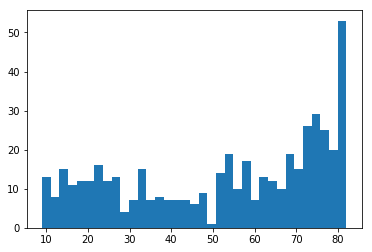

In [662]:
plt.hist(X['Games'], bins=35);

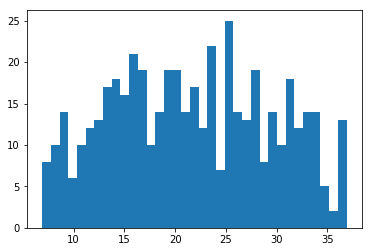

In [665]:
plt.hist(X['MP'], bins=35);

In [666]:
X['GS'].value_counts()

0.0     72
1.0     39
3.0     27
2.0     23
4.0     15
10.0    12
12.0    11
11.0    10
7.0      9
5.0      9
6.0      9
82.0     8
80.0     8
77.0     7
14.0     7
19.0     7
73.0     7
9.0      7
36.0     7
81.0     7
8.0      6
17.0     6
59.0     6
21.0     6
13.0     6
40.0     5
67.0     5
57.0     5
35.0     5
75.0     5
30.0     5
54.0     4
78.0     4
70.0     4
37.0     4
48.0     4
18.0     4
71.0     4
25.0     4
72.0     4
50.0     4
74.0     4
24.0     3
60.0     3
16.0     3
58.0     3
69.0     3
46.0     3
41.0     3
64.0     3
65.0     3
26.0     3
32.0     3
68.0     3
63.0     3
62.0     3
39.0     2
76.0     2
15.0     2
56.0     2
22.0     2
43.0     2
79.0     2
20.0     2
33.0     2
49.0     2
31.0     2
47.0     1
52.0     1
53.0     1
61.0     1
34.0     1
28.0     1
51.0     1
45.0     1
23.0     1
44.0     1
Name: GS, dtype: int64

(array([ 209.,   58.,   31.,   18.,   26.,   17.,   18.,   25.,   30.,   47.]),
 array([  0. ,   8.2,  16.4,  24.6,  32.8,  41. ,  49.2,  57.4,  65.6,
         73.8,  82. ]),
 <a list of 10 Patch objects>)

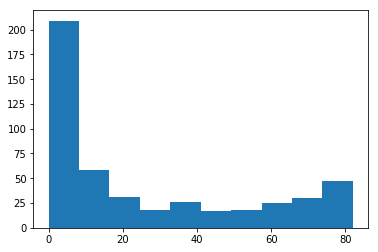

In [667]:
plt.hist(X['GS'])

In [671]:
X[X['MP']<=11]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                           
Meyers Leonard        1.1  0.673  1.6  0.3  0.423  0.8  0.5  0.0  1.8  0.660   
Caleb Swanigan        0.9  0.442  1.9  0.0  0.125  0.3  0.5  0.1  1.4  0.408   
Shabazz Muhammad      1.3  0.422  3.2  0.1  0.211  0.6  0.2  0.1  0.9  0.405   
Malik Beasley         0.7  0.469  1.5  0.5  0.341  1.3  0.5  0.1  0.9  0.489   
Richard Jefferson     0.5  0.500  1.0  0.1  0.286  0.4  0.8  0.1  0.8  0.481   
Darrell Arthur        0.7  0.583  1.3  0.4  0.348  1.2  0.5  0.2  0.6  0.553   
JaVale McGee          2.1  0.638  3.3  0.0  0.000  0.1  0.5  0.9  1.7  0.621   
Willie Reed           2.0  0.669  3.0  0.0  0.500  0.1  0.2  0.6  2.2  0.671   
Boban Marjanovic      1.9  0.551  3.5  0.0  0.000  0.0  0.4  0.3  2.7  0.551   
Gary Payton           1.2  0.464  2.5  0.4  0.308  1.2  1.1  0.2  1.6  0.463   
Ivica Zubac           1.4  0.504  2.8  0.0  0.000  0.0  0.6  0.3  1.8  0.500   
Andrew Bogut          0.7  0.680  1.1  0.0  0.000  0.0  0.7  0.6  2.3  0.680   
Bruno Caboclo         0.6  0.429  1.4  0.3  0.200  1.5  0.3  0.4  1.4  0.362   
Georgios Papagiannis  1.1  0.415  2.6  0.0  0.000  0.0  0.6  0.4  1.5  0.415   
Tarik Black           1.5  0.638  2.3  0.0  0.091  0.2  0.3  0.6  2.0  0.594   
Briante Weber         0.4  0.385  1.0  0.3  0.444  0.7  1.0  0.2  1.2  0.500   
Zhou Qi               0.2  0.308  0.7  0.1  0.105  1.1  0.1  0.8  0.9  0.219   
DeAndre Liggins       0.4  0.417  0.9  0.3  0.471  0.6  0.8  0.1  0.9  0.537   
Omer Asik             0.5  0.438  1.1  0.0  0.000  0.0  0.1  0.1  2.1  0.438   
Joffrey Lauvergne     1.8  0.530  3.4  0.0  0.000  0.1  0.7  0.1  2.0  0.516   
Brandon Paul          0.6  0.548  1.1  0.2  0.278  0.8  0.6  0.1  1.0  0.492   
Derrick White         0.5  0.400  1.2  0.5  0.615  0.8  0.5  0.2  1.2  0.606   
Lorenzo Brown         0.9  0.545  1.6  0.1  0.167  0.9  0.9  0.0  1.0  0.441   
Lucas Nogueira        0.9  0.721  1.2  0.1  0.263  0.4  0.4  0.9  1.4  0.644   
Malcolm Miller        0.3  0.714  0.5  0.5  0.381  1.4  0.2  0.1  0.7  0.607   
Abdel Nader           0.6  0.321  1.8  0.5  0.354  1.4  0.5  0.2  1.2  0.413   
Jabari Bird           0.9  0.632  1.5  0.2  0.429  0.5  0.6  0.1  1.0  0.635   
Guerschon Yabusele    0.4  0.583  0.7  0.4  0.324  1.1  0.5  0.2  1.1  0.525   
Damyean Dotson        1.1  0.538  2.1  0.5  0.324  1.5  0.7  0.0  1.7  0.516   
Willy Hernangomez     1.8  0.632  2.9  0.0  0.200  0.2  0.8  0.3  1.7  0.611   
Cedi Osman            1.0  0.586  1.6  0.5  0.368  1.4  0.7  0.0  1.7  0.570   
John Holland          0.3  0.261  1.0  0.5  0.306  1.5  0.2  0.1  0.8  0.381   
Joe Young             1.0  0.458  2.3  0.5  0.379  1.2  0.7  0.0  1.0  0.497   
T.J. Leaf             0.9  0.489  1.8  0.3  0.429  0.8  0.2  0.1  1.0  0.537   
Damien Wilkins        0.5  0.429  1.1  0.2  0.222  0.9  0.5  0.1  0.6  0.385   
Shabazz Muhammad      3.1  0.576  5.4  0.3  0.375  0.7  0.6  0.1  2.1  0.575   
Sean Kilpatrick       0.8  0.500  1.6  0.6  0.283  2.0  0.7  0.0  1.0  0.457   
Gary Payton           0.9  0.524  1.8  0.2  0.167  1.0  0.8  0.1  1.1  0.424   
Rashad Vaughn         0.4  0.533  0.7  0.6  0.371  1.6  0.5  0.1  0.7  0.550   
Boban Marjanovic      2.2  0.519  4.2  0.0  0.000  0.0  0.7  0.3  2.2  0.519   
Henry Ellenson        0.9  0.384  2.3  0.5  0.333  1.6  0.5  0.0  1.9  0.432   
Kay Felder            1.1  0.333  3.4  0.3  0.222  1.3  1.4  0.1  0.9  0.333   
Quincy Pondexter      0.5  0.407  1.2  0.1  0.136  1.0  0.4  0.1  0.8  0.316   
Derrick Walton        0.1  0.125  0.5  0.4  0.412  1.1  1.0  0.2  0.9  0.460   
Jason Smith           1.2  0.494  2.5  0.1  0.125  1.0  0.4  0.4  1.1  0.409   
Johnny O'Bryant       1.5  0.422  3.6  0.4  0.326  1.2  0.4  0.2  1.8  0.439   
Julyan Stone          0.0  0.000  0.0  0.3  0.462  0.6  1.1  0.1  1.2  0.692   

                       FG    FG%  FGA   FT    FT%  FTA    GS  Games    MP  \
Name                     

In [ ]:
## definitely can take GS out and maybe take out a few players less than or equal to 13 Games
## also take out players who play less or equal to 11 min a game.

In [673]:
X = X[X['MP']>=11]

In [677]:
X = X[X['Games']>=13]

In [681]:
X.head()

2P    2P%   2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  0.4  3.6  0.519  8.5   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  0.4  3.3  0.506  8.2   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  0.6  6.2  0.503  3.3   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  1.4  6.6  0.505  6.1   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  0.4  2.7  0.484  3.3   

                   FG%   FGA   FT    FT%  FTA    GS  Games    MP  ORB   PF  \
Name                                                                         
Damian Lillard   0.439  19.4  6.8  0.916  7.4  73.0   73.0  36.6  0.8  1.6   
CJ McCollum      0.443  18.6  2.6  0.836  3.1  81.0   81.0  36.1  0.7  2.1   
Al-Farouq Aminu  0.395   8.4  0.9  0.738  1.2  67.0   69.0  30.0  1.4  2.0   
Jusuf Nurkic     0.505  12.0  2.2  0.630  3.5  79.0   79.0  26.4  2.4  3.1   
Evan Turner      0.447   7.3  1.2  0.850  1.4  40.0   79.0  25.7  0.4  2.1   

                  PTS  STL  TOV  TRB  cluster_scaled  
Name                                                  
Damian Lillard   26.9  1.1  2.8  4.5               0  
CJ McCollum      21.4  1.0  1.9  4.0               0  
Al-Farouq Aminu   9.3  1.1  1.1  7.6               8  
Jusuf Nurkic     14.3  0.8  2.3  9.0               5  
Evan Turner       8.2  0.6  1.3  3.1               3

In [682]:
X = X.drop(columns=['GS','cluster_scaled'])

In [683]:
X.head()

2P    2P%   2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  0.4  3.6  0.519  8.5   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  0.4  3.3  0.506  8.2   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  0.6  6.2  0.503  3.3   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  1.4  6.6  0.505  6.1   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  0.4  2.7  0.484  3.3   

                   FG%   FGA   FT    FT%  FTA  Games    MP  ORB   PF   PTS  \
Name                                                                         
Damian Lillard   0.439  19.4  6.8  0.916  7.4   73.0  36.6  0.8  1.6  26.9   
CJ McCollum      0.443  18.6  2.6  0.836  3.1   81.0  36.1  0.7  2.1  21.4   
Al-Farouq Aminu  0.395   8.4  0.9  0.738  1.2   69.0  30.0  1.4  2.0   9.3   
Jusuf Nurkic     0.505  12.0  2.2  0.630  3.5   79.0  26.4  2.4  3.1  14.3   
Evan Turner      0.447   7.3  1.2  0.850  1.4   79.0  25.7  0.4  2.1   8.2   

                 STL  TOV  TRB  
Name                            
Damian Lillard   1.1  2.8  4.5  
CJ McCollum      1.0  1.9  4.0  
Al-Farouq Aminu  1.1  1.1  7.6  
Jusuf Nurkic     0.8  2.3  9.0  
Evan Turner      0.6  1.3  3.1

In [ ]:
#going to try without GS feature and then took out more scrubs.

In [ ]:
## going to use minmaxscaler

In [684]:
minmaxscaler= MinMaxScaler()
minmaxscaled = minmaxscaler.fit_transform(X)
kmeans= KMeans(n_clusters=10)
kmeans.fit(minmaxscaled)
X['cluster_scaled'] = kmeans.labels_
Counter(kmeans.labels_)

Counter({1: 23, 3: 66, 8: 11, 7: 64, 4: 51, 2: 61, 9: 11, 6: 56, 0: 39, 5: 38})

In [694]:
X[X['cluster_scaled']==0]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Corey Brewer      2.3  0.532  4.3  1.3  0.343  3.7  1.3  0.3  2.3  0.524  3.6   
Jae Crowder       2.4  0.462  5.3  1.8  0.316  5.6  1.5  0.3  3.1  0.468  4.2   
Thabo Sefolosha   2.3  0.551  4.1  0.8  0.381  2.2  0.9  0.3  3.5  0.558  3.1   
Quinn Cook        2.3  0.514  4.5  1.4  0.442  3.2  2.7  0.0  2.2  0.575  3.7   
Danilo Gallinari  3.1  0.455  6.9  1.7  0.324  5.3  2.0  0.5  4.4  0.469  4.9   
Tyrone Wallace    3.3  0.483  6.9  0.3  0.250  1.3  2.4  0.4  2.8  0.466  3.7   
Milos Teodosic    1.4  0.492  2.8  2.0  0.379  5.2  4.6  0.1  2.4  0.542  3.4   
Isaiah Thomas     3.2  0.429  7.4  1.9  0.327  5.9  5.0  0.1  1.5  0.456  5.1   
Jordan Clarkson   4.4  0.505  8.6  1.3  0.324  4.0  3.3  0.1  2.2  0.499  5.6   
George Hill       2.2  0.480  4.6  1.3  0.453  3.0  2.8  0.3  2.2  0.558  3.6   
Elfrid Payton     4.5  0.467  9.7  0.3  0.200  1.3  6.2  0.3  4.4  0.447  4.8   
Isaiah Canaan     1.6  0.429  3.7  1.2  0.333  3.5  4.0  0.1  2.0  0.463  2.7   
Mike James        3.0  0.442  6.7  0.8  0.268  3.0  3.8  0.2  2.4  0.429  3.8   
Gerald Green      1.4  0.504  2.8  2.7  0.369  7.3  0.6  0.4  2.9  0.540  4.1   
Doug McDermott    1.8  0.465  3.9  1.5  0.494  3.0  1.1  0.2  2.3  0.586  3.3   
Devin Harris      1.7  0.465  3.6  1.0  0.352  2.8  1.9  0.2  1.7  0.493  2.7   
Wayne Selden      1.9  0.456  4.2  1.4  0.402  3.5  1.9  0.1  1.1  0.522  3.3   
Marco Belinelli   2.9  0.618  4.7  2.0  0.385  5.3  1.6  0.3  1.6  0.597  4.9   
Ersan Ilyasova    2.7  0.488  5.6  1.3  0.361  3.6  1.7  0.4  4.8  0.509  4.0   
Jerryd Bayless    1.4  0.474  3.0  1.4  0.370  3.7  1.4  0.2  1.7  0.519  2.8   
Emmanuel Mudiay   3.0  0.418  7.2  0.4  0.196  2.1  3.9  0.3  2.2  0.390  3.4   
Trey Burke        4.3  0.556  7.8  1.1  0.362  2.9  4.7  0.1  1.6  0.552  5.4   
Trevor Booker     4.1  0.536  7.7  0.2  0.250  0.7  2.1  0.3  4.5  0.523  4.3   
George Hill       2.3  0.509  4.6  1.1  0.351  3.2  2.8  0.6  1.8  0.516  3.5   
Isaiah Thomas     3.2  0.449  7.1  1.5  0.253  5.8  4.5  0.1  1.6  0.418  4.7   
Rodney Hood       3.0  0.492  6.1  1.2  0.352  3.4  1.4  0.2  2.2  0.505  4.2   
Dwyane Wade       3.8  0.479  7.9  0.5  0.329  1.5  3.5  0.7  3.1  0.482  4.3   
Jordan Clarkson   3.1  0.486  6.4  1.6  0.407  3.9  1.7  0.1  1.6  0.533  4.7   
Malcolm Brogdon   3.8  0.532  7.1  1.3  0.385  3.4  3.2  0.3  2.8  0.547  5.1   
Jabari Parker     4.2  0.514  8.1  1.0  0.383  2.6  1.9  0.3  3.5  0.529  5.2   
Reggie Jackson    4.3  0.475  9.1  1.2  0.308  3.8  5.3  0.1  2.1  0.471  5.5   
Zach LaVine       3.9  0.405  9.7  1.8  0.341  5.1  3.0  0.2  3.5  0.442  5.7   
Nikola Mirotic    3.0  0.525  5.6  2.8  0.429  6.4  1.6  0.5  5.6  0.588  5.7   
Cameron Payne     2.1  0.419  5.0  1.4  0.385  3.6  4.5  0.4  2.0  0.486  3.5   
Dion Waiters      3.7  0.463  8.0  1.7  0.306  5.7  3.8  0.3  2.3  0.461  5.4   
Dwyane Wade       4.4  0.447  9.8  0.4  0.220  2.0  3.1  0.7  2.9  0.427  4.8   
Terrence Ross     1.9  0.469  4.1  1.3  0.323  3.9  1.6  0.5  2.6  0.476  3.2   
Damion Lee        3.1  0.511  6.1  1.0  0.250  4.0  1.9  0.1  4.0  0.457  4.1   
Ersan Ilyasova    2.7  0.532  5.0  1.3  0.359  3.7  1.1  0.4  3.8  0.535  4.0   

                    FG%   FGA   FT    FT%  FTA  Games    MP  ORB   PF   PTS  \
Name                                                                          
Corey Brewer      0.444   8.0  1.7  0.795  2.2   18.0  28.6  1.1  3.1  10.1   
Jae Crowder       0.386  10.9  1.6  0.768  2.1   27.0  27.6  0.7  2.3  11.8   
Thabo Sefolosha   0.492   6.3  1.2  0.815  1.4   38.0  21.2  0.8  1.6   8.2   
Quinn Cook        0.484   7.6  0.7  0.880  0.8   33.0  22.4  0.3  1.8   9.5   
Danilo Gallinari  0.398  12.2  3.9  0.931  4.1   21.0  32.0  0.4  1.4  15.3   
Tyrone Wallace    0.445   8.2  2.0  0.782  2.6   30.0  28.4  0.7  2.8   9.7   
Milos Teodosic    0.419   8.0  0.9  0.848  1.0   45.0  25.2  0.4 

In [721]:
mydbscan = DBSCAN(eps = .39,min_samples = 3)
mydbscan.fit(minmaxscaled)
dbscan_clusters = mydbscan.labels_
X['DBSCAN_clusters'] = dbscan_clusters
Counter(mydbscan.labels_)

Counter({-1: 199, 6: 3, 0: 177, 1: 25, 3: 7, 2: 3, 4: 3, 5: 3})

In [724]:
X[X['DBSCAN_clusters']==3]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                        
Jerami Grant       2.6  0.613  4.3  0.4  0.291  1.4  0.7  1.0  2.9  0.570   
Alex Len           3.1  0.568  5.4  0.0  0.333  0.0  1.2  0.9  5.0  0.567   
Jonas Valanciunas  4.7  0.587  8.0  0.4  0.405  1.0  1.1  0.9  6.2  0.590   
Kyle O'Quinn       2.9  0.599  4.8  0.1  0.235  0.2  2.1  1.3  4.5  0.589   
Jarrett Allen      3.2  0.599  5.3  0.1  0.333  0.2  0.7  1.2  3.4  0.596   
John Henson        3.8  0.578  6.5  0.0  0.143  0.1  1.5  1.4  4.8  0.573   
John Collins       4.0  0.598  6.7  0.2  0.340  0.6  1.3  1.1  4.9  0.591   

                    FG    FG%  FGA   FT    FT%  FTA  Games    MP  ORB   PF  \
Name                                                                         
Jerami Grant       3.0  0.535  5.6  2.0  0.675  3.0   81.0  20.3  1.1  1.9   
Alex Len           3.1  0.566  5.5  2.3  0.684  3.3   69.0  20.2  2.5  2.3   
Jonas Valanciunas  5.1  0.568  8.9  2.2  0.806  2.7   77.0  22.4  2.4  2.5   
Kyle O'Quinn       2.9  0.583  5.0  1.3  0.772  1.6   77.0  18.0  1.6  2.5   
Jarrett Allen      3.3  0.589  5.5  1.6  0.776  2.0   72.0  20.0  2.0  2.0   
John Henson        3.8  0.572  6.6  1.2  0.570  2.1   76.0  25.9  2.0  2.7   
John Collins       4.2  0.576  7.4  1.8  0.715  2.5   74.0  24.1  2.4  2.9   

                    PTS  STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  
Name                                                                     
Jerami Grant        8.4  0.4  0.7  3.9               4                3  
Alex Len            8.5  0.4  1.1  7.5               4                3  
Jonas Valanciunas  12.7  0.4  1.5  8.6               5                3  
Kyle O'Quinn        7.1  0.5  1.3  6.1               4                3  
Jarrett Allen       8.2  0.4  1.1  5.4               4                3  
John Henson         8.8  0.6  1.1  6.8               5                3  
John Collins       10.5  0.6  1.4  7.3               5                3

In [ ]:
## DBSCAN still not working very well going to try other clustering methods

In [728]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering

In [729]:
AG = AgglomerativeClustering(n_clusters=10)

In [ ]:
minmaxscaler= MinMaxScaler()
minmaxscaled = minmaxscaler.fit_transform(X)
kmeans= KMeans(n_clusters=10)
kmeans.fit(minmaxscaled)
X['cluster_scaled'] = kmeans.labels_
Counter(kmeans.labels_)

In [730]:
AG.fit(minmaxscaled)
AG_clusters = AG.labels_
X['AG_cluster'] = AG_clusters
Counter(AG.labels_)

Counter({1: 30, 2: 70, 0: 31, 4: 39, 7: 68, 6: 51, 9: 21, 5: 49, 3: 50, 8: 11})

In [731]:
X.head()

2P    2P%   2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%   FG  \
Name                                                                            
Damian Lillard   5.4  0.501  10.8  3.1  0.361  8.6  6.6  0.4  3.6  0.519  8.5   
CJ McCollum      5.9  0.465  12.7  2.3  0.397  5.9  3.4  0.4  3.3  0.506  8.2   
Al-Farouq Aminu  1.5  0.432   3.5  1.8  0.369  4.9  1.2  0.6  6.2  0.503  3.3   
Jusuf Nurkic     6.1  0.508  11.9  0.0  0.000  0.1  1.8  1.4  6.6  0.505  6.1   
Evan Turner      2.7  0.485   5.6  0.5  0.318  1.7  2.2  0.4  2.7  0.484  3.3   

                   FG%   FGA   FT    FT%  FTA  Games    MP  ORB   PF   PTS  \
Name                                                                         
Damian Lillard   0.439  19.4  6.8  0.916  7.4   73.0  36.6  0.8  1.6  26.9   
CJ McCollum      0.443  18.6  2.6  0.836  3.1   81.0  36.1  0.7  2.1  21.4   
Al-Farouq Aminu  0.395   8.4  0.9  0.738  1.2   69.0  30.0  1.4  2.0   9.3   
Jusuf Nurkic     0.505  12.0  2.2  0.630  3.5   79.0  26.4  2.4  3.1  14.3   
Evan Turner      0.447   7.3  1.2  0.850  1.4   79.0  25.7  0.4  2.1   8.2   

                 STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  AG_cluster  
Name                                                                         
Damian Lillard   1.1  2.8  4.5               1               -1           1  
CJ McCollum      1.0  1.9  4.0               1                6           1  
Al-Farouq Aminu  1.1  1.1  7.6               3               -1           2  
Jusuf Nurkic     0.8  2.3  9.0               8               -1           0  
Evan Turner      0.6  1.3  3.1               3                0           4

In [753]:
X[X['AG_cluster']==9]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                        
Noah Vonleh        1.4  0.500  2.7  0.1  0.333  0.2  0.4  0.3  4.0  0.500   
Kenneth Faried     2.4  0.517  4.6  0.0  0.000  0.0  0.6  0.4  2.7  0.514   
Omri Casspi        2.1  0.595  3.5  0.2  0.455  0.4  1.0  0.4  3.2  0.604   
JaKarr Sampson     1.8  0.549  3.2  0.2  0.500  0.5  0.4  1.0  2.6  0.574   
Emeka Okafor       1.8  0.505  3.7  0.0  0.000  0.0  0.3  1.0  2.8  0.505   
Tony Allen         1.8  0.506  3.6  0.2  0.333  0.5  0.4  0.1  1.2  0.505   
Nerlens Noel       1.8  0.529  3.5  0.0  0.000  0.0  0.7  0.7  4.0  0.524   
Ivan Rabb          2.4  0.566  4.2  0.0  0.000  0.0  0.9  0.4  2.9  0.566   
Brandan Wright     2.1  0.576  3.7  0.0  0.000  0.0  0.5  0.9  2.3  0.576   
Trevor Booker      1.8  0.578  3.1  0.1  0.286  0.2  0.8  0.3  2.3  0.569   
Isaiah Hicks       1.7  0.492  3.5  0.1  0.222  0.5  0.9  0.2  1.7  0.472   
Tyler Zeller       2.7  0.567  4.8  0.2  0.385  0.6  0.7  0.5  3.1  0.568   
Jahlil Okafor      2.8  0.576  4.8  0.0  0.250  0.2  0.4  0.6  2.3  0.570   
Timofey Mozgov     1.5  0.640  2.4  0.1  0.222  0.6  0.4  0.4  2.1  0.581   
Trevor Booker      2.1  0.514  4.1  0.2  0.214  0.8  1.0  0.3  2.6  0.482   
Al Jefferson       3.1  0.541  5.7  0.0  0.000  0.1  0.8  0.6  3.1  0.534   
Tyler Zeller       2.6  0.602  4.3  0.0  0.000  0.1  0.8  0.6  2.7  0.590   
Jordan Mickey      1.6  0.561  2.9  0.1  0.125  0.7  0.4  0.4  2.7  0.488   
Cody Zeller        2.5  0.542  4.6  0.1  0.667  0.1  0.9  0.6  3.3  0.551   
Willy Hernangomez  1.7  0.500  3.5  0.2  0.571  0.3  0.5  0.4  3.5  0.530   
Khem Birch         1.6  0.540  3.0  0.0  0.000  0.0  0.8  0.5  2.6  0.540   

                    FG    FG%  FGA   FT    FT%  FTA  Games    MP  ORB   PF  \
Name                                                                         
Noah Vonleh        1.4  0.490  2.9  0.7  0.742  0.9   33.0  14.4  1.1  1.3   
Kenneth Faried     2.4  0.514  4.6  1.1  0.706  1.6   32.0  14.4  2.1  1.6   
Omri Casspi        2.3  0.580  3.9  0.9  0.725  1.3   53.0  14.0  0.6  1.3   
JaKarr Sampson     2.0  0.543  3.7  0.5  0.625  0.7   22.0  15.6  1.0  2.2   
Emeka Okafor       1.8  0.505  3.7  0.7  0.818  0.8   26.0  13.6  1.8  1.2   
Tony Allen         2.0  0.484  4.1  0.5  0.524  1.0   22.0  12.4  0.9  2.2   
Nerlens Noel       1.8  0.524  3.5  0.7  0.750  0.9   30.0  15.7  1.6  2.0   
Ivan Rabb          2.4  0.566  4.2  0.8  0.806  1.0   36.0  14.3  1.5  1.5   
Brandan Wright     2.1  0.576  3.7  0.8  0.636  1.2   27.0  13.6  1.2  1.1   
Trevor Booker      1.8  0.560  3.3  1.0  0.821  1.2   33.0  15.0  1.4  1.5   
Isaiah Hicks       1.8  0.458  4.0  0.7  0.667  1.0   18.0  13.3  0.6  2.5   
Tyler Zeller       3.0  0.546  5.5  1.0  0.667  1.4   42.0  16.7  1.5  1.9   
Jahlil Okafor      2.8  0.566  5.0  0.7  0.760  1.0   26.0  12.6  0.7  1.7   
Timofey Mozgov     1.7  0.559  3.0  0.7  0.767  1.0   31.0  11.6  1.0  1.3   
Trevor Booker      2.3  0.464  4.9  0.6  0.909  0.6   17.0  15.8  1.9  1.5   
Al Jefferson       3.1  0.534  5.8  0.8  0.833  1.0   36.0  13.4  0.8  1.8   
Tyler Zeller       2.6  0.590  4.4  0.7  0.895  0.8   24.0  16.9  2.0  2.0   
Jordan Mickey      1.7  0.476  3.6  0.6  0.684  0.8   23.0  12.3  0.8  1.6   
Cody Zeller        2.6  0.545  4.7  1.8  0.718  2.6   33.0  19.0  2.0  2.5   
Willy Hernangomez  1.9  0.506  3.8  2.1  0.758  2.8   22.0  11.9  1.8  1.5   
Khem Birch         1.6  0.540  3.0  1.0  0.689  1.5   42.0  13.8  1.7  1.3   

                   PTS  STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  \
Name                                                                     
Noah Vonleh        3.6  0.2  0.5  5.1               2                0   
Kenneth Faried     5.9  0.4  0.7  4.8               4                1   
Omri Casspi        5.7  0.3  0.7  3.8               4               -1   
JaKarr Sampson     4.7  0.4  0.4  3.5               4               -1   
Emeka Oka

In [757]:
AP = AffinityPropagation(convergence_iter=8)

In [758]:
AP.fit(minmaxscaled)
AP_clusters = AP.labels_
X['AP_clusters'] = AP_clusters
Counter(AP.labels_)

Counter({0: 3,
         24: 13,
         23: 32,
         4: 13,
         21: 19,
         3: 19,
         28: 24,
         15: 16,
         5: 29,
         12: 19,
         16: 2,
         7: 7,
         1: 23,
         27: 14,
         19: 6,
         13: 19,
         22: 11,
         20: 16,
         14: 12,
         2: 14,
         8: 11,
         11: 7,
         26: 9,
         9: 19,
         17: 12,
         10: 19,
         6: 15,
         25: 10,
         18: 7})

In [775]:
X[X['AP_clusters']==15]

2P    2P%  2PA   3P    3P%  3PA  AST  BLK  DRB   EFG%  \
Name                                                                        
Ed Davis           2.2  0.584  3.7  0.0  0.000  0.0  0.5  0.7  5.0  0.582   
Jerami Grant       2.6  0.613  4.3  0.4  0.291  1.4  0.7  1.0  2.9  0.570   
Mason Plumlee      3.0  0.602  5.0  0.0  0.000  0.0  1.9  1.1  3.6  0.601   
David West         2.9  0.576  5.1  0.0  0.375  0.1  1.9  1.0  2.4  0.575   
Montrezl Harrell   4.6  0.641  7.1  0.0  0.143  0.1  1.0  0.7  2.7  0.636   
Kosta Koufos       3.1  0.571  5.5  0.0  0.000  0.0  1.2  0.5  4.5  0.571   
Tyson Chandler     2.6  0.647  4.1  0.0  0.000  0.0  1.2  0.6  6.2  0.647   
Alex Len           3.1  0.568  5.4  0.0  0.333  0.0  1.2  0.9  5.0  0.567   
Dwight Powell      2.9  0.656  4.4  0.4  0.333  1.1  1.2  0.4  3.9  0.626   
Jonas Valanciunas  4.7  0.587  8.0  0.4  0.405  1.0  1.1  0.9  6.2  0.590   
Jakob Poeltl       3.1  0.660  4.7  0.0  0.500  0.0  0.7  1.2  2.8  0.660   
Kyle O'Quinn       2.9  0.599  4.8  0.1  0.235  0.2  2.1  1.3  4.5  0.589   
Jarrett Allen      3.2  0.599  5.3  0.1  0.333  0.2  0.7  1.2  3.4  0.596   
John Henson        3.8  0.578  6.5  0.0  0.143  0.1  1.5  1.4  4.8  0.573   
Bismack Biyombo    2.2  0.521  4.3  0.0  0.000  0.0  0.8  1.2  4.0  0.520   
John Collins       4.0  0.598  6.7  0.2  0.340  0.6  1.3  1.1  4.9  0.591   

                    FG    FG%  FGA   FT    FT%  FTA  Games    MP  ORB   PF  \
Name                                                                         
Ed Davis           2.2  0.582  3.7  0.9  0.667  1.4   78.0  18.9  2.3  2.4   
Jerami Grant       3.0  0.535  5.6  2.0  0.675  3.0   81.0  20.3  1.1  1.9   
Mason Plumlee      3.0  0.601  5.0  1.1  0.458  2.4   74.0  19.4  1.8  2.5   
David West         3.0  0.571  5.2  0.8  0.759  1.1   73.0  13.7  0.9  1.6   
Montrezl Harrell   4.6  0.635  7.2  1.8  0.626  2.9   76.0  17.0  1.4  1.9   
Kosta Koufos       3.1  0.571  5.5  0.5  0.446  1.0   71.0  19.6  2.1  2.1   
Tyson Chandler     2.6  0.647  4.1  1.3  0.624  2.0   46.0  25.0  2.9  2.3   
Alex Len           3.1  0.566  5.5  2.3  0.684  3.3   69.0  20.2  2.5  2.3   
Dwight Powell      3.2  0.593  5.4  1.7  0.719  2.3   79.0  21.2  1.7  2.4   
Jonas Valanciunas  5.1  0.568  8.9  2.2  0.806  2.7   77.0  22.4  2.4  2.5   
Jakob Poeltl       3.1  0.659  4.7  0.7  0.594  1.2   82.0  18.6  2.0  2.6   
Kyle O'Quinn       2.9  0.583  5.0  1.3  0.772  1.6   77.0  18.0  1.6  2.5   
Jarrett Allen      3.3  0.589  5.5  1.6  0.776  2.0   72.0  20.0  2.0  2.0   
John Henson        3.8  0.572  6.6  1.2  0.570  2.1   76.0  25.9  2.0  2.7   
Bismack Biyombo    2.2  0.520  4.3  1.2  0.650  1.9   82.0  18.2  1.8  1.9   
John Collins       4.2  0.576  7.4  1.8  0.715  2.5   74.0  24.1  2.4  2.9   

                    PTS  STL  TOV  TRB  cluster_scaled  DBSCAN_clusters  \
Name                                                                      
Ed Davis            5.3  0.4  0.8  7.4               4                1   
Jerami Grant        8.4  0.4  0.7  3.9               4                3   
Mason Plumlee       7.1  0.7  1.4  5.4               4               -1   
David West          6.8  0.6  1.1  3.3               4               -1   
Montrezl Harrell   11.0  0.5  0.9  4.0               4               -1   
Kosta Koufos        6.7  0.7  0.7  6.6               4                1   
Tyson Chandler      6.5  0.3  1.3  9.1               4               -1   
Alex Len            8.5  0.4  1.1  7.5               4                3   
Dwight Powell       8.5  0.8  0.7  5.6               4               -1   
Jonas Valanciunas  12.7  0.4  1.5  8.6               5                3   
Jakob Poeltl        6.9  0.5  1.0  4.8               4               -1   
Kyle O'Quinn        7.1  0.5  1.3  6.1               4                3   
Jarrett Allen       8.2  0.4  1.1  5.4               4                3   
John Henson         8.8  0.6  1.1  6.8               5                3   
Bismack Biyombo     5.7  0.3

In [ ]:
## going to use PCA

In [ ]:
## pca use two components and plot that
## pc1 vs pc2

In [319]:
type(table)

bs4.element.Tag

In [336]:
table.find('td').text

'Klay Thompson'

In [346]:
table.find('td', {'class': 'center'}).text

'27'

In [374]:
table.find('td', {'class': 'right'}).attrs

{'class': ['right', ''], 'data-stat': 'g'}

In [352]:
table.find_all('td', {'class': 'left'})

[<td class="left " csk="Thompson,Klay" data-append-csv="thompkl01" data-stat="player"><a href="/players/t/thompkl01.html">Klay Thompson</a></td>,
 <td class="left " csk="Durant,Kevin" data-append-csv="duranke01" data-stat="player"><a href="/players/d/duranke01.html">Kevin Durant</a></td>,
 <td class="left " csk="Green,Draymond" data-append-csv="greendr01" data-stat="player"><a href="/players/g/greendr01.html">Draymond Green</a></td>,
 <td class="left " csk="Curry,Stephen" data-append-csv="curryst01" data-stat="player"><a href="/players/c/curryst01.html">Stephen Curry</a></td>,
 <td class="left " csk="Iguodala,Andre" data-append-csv="iguodan01" data-stat="player"><a href="/players/i/iguodan01.html">Andre Iguodala</a></td>,
 <td class="left " csk="Cook,Quinn" data-append-csv="cookqu01" data-stat="player"><a href="/players/c/cookqu01.html">Quinn Cook</a></td>,
 <td class="left " csk="Young,Nick" data-append-csv="youngni01" data-stat="player"><a href="/players/y/youngni01.html">Nick Young<

In [378]:
table.find('td', {'class': 'right', 'data-stat': 'gs'}).text

'73'

In [337]:
type(table.find_all('td'))

bs4.element.ResultSet

In [327]:
table.find_all('td')

[<td class="left " csk="Thompson,Klay" data-append-csv="thompkl01" data-stat="player"><a href="/players/t/thompkl01.html">Klay Thompson</a></td>,
 <td class="center " data-stat="age">27</td>,
 <td class="right " data-stat="g"><a href="/players/t/thompkl01/gamelog/2018/">73</a></td>,
 <td class="right " data-stat="gs">73</td>,
 <td class="right " data-stat="mp_per_g">34.3</td>,
 <td class="right " data-stat="fg_per_g">7.9</td>,
 <td class="right " data-stat="fga_per_g">16.2</td>,
 <td class="right " data-stat="fg_pct">.488</td>,
 <td class="right " data-stat="fg3_per_g">3.1</td>,
 <td class="right " data-stat="fg3a_per_g">7.1</td>,
 <td class="right " data-stat="fg3_pct">.440</td>,
 <td class="right " data-stat="fg2_per_g">4.7</td>,
 <td class="right " data-stat="fg2a_per_g">9.0</td>,
 <td class="right " data-stat="fg2_pct">.526</td>,
 <td class="right " data-stat="efg_pct">.585</td>,
 <td class="right " data-stat="ft_per_g">1.1</td>,
 <td class="right " data-stat="fta_per_g">1.3</td>,


In [304]:
row = table.find('tr').find_all('td')[1:]

In [317]:
type(row)

list

In [318]:
row[:1]

[<td class="center " data-stat="age">27</td>]

In [ ]:
for row in table.find('tr').find

In [270]:
table.find('tbody').find_all('tr')

[<tr><th class="center " csk="1" data-stat="ranker" scope="row">1</th><td class="left " csk="Thompson,Klay" data-append-csv="thompkl01" data-stat="player"><a href="/players/t/thompkl01.html">Klay Thompson</a></td><td class="center " data-stat="age">27</td><td class="right " data-stat="g"><a href="/players/t/thompkl01/gamelog/2018/">73</a></td><td class="right " data-stat="gs">73</td><td class="right " data-stat="mp_per_g">34.3</td><td class="right " data-stat="fg_per_g">7.9</td><td class="right " data-stat="fga_per_g">16.2</td><td class="right " data-stat="fg_pct">.488</td><td class="right " data-stat="fg3_per_g">3.1</td><td class="right " data-stat="fg3a_per_g">7.1</td><td class="right " data-stat="fg3_pct">.440</td><td class="right " data-stat="fg2_per_g">4.7</td><td class="right " data-stat="fg2a_per_g">9.0</td><td class="right " data-stat="fg2_pct">.526</td><td class="right " data-stat="efg_pct">.585</td><td class="right " data-stat="ft_per_g">1.1</td><td class="right " data-stat="

In [252]:
type(table)

bs4.element.ResultSet

In [168]:
ol.text

'\n\n\nPer Game \n\n\n\n\n\n\n'

In [225]:
type(ol)

bs4.element.Tag

In [165]:
ol.attrs

{'id': 'all_per_game',
 'class': ['table_wrapper', 'setup_commented', 'commented']}

In [192]:
ol.find_all('div')

[<div class="section_heading">
 <span class="section_anchor" data-label="Per Game" id="per_game_link"></span>
 <h2>Per Game</h2> <div class="section_heading_text">
 <ul>
 </ul>
 </div>
 </div>, <div class="section_heading_text">
 <ul>
 </ul>
 </div>, <div class="placeholder"></div>]

In [93]:
soup.content

In [73]:
soup.find('div', {'class':'overthrow table_container'}).find_all('td')

[<td class="left " csk="Bell,Jordan" data-append-csv="belljo01" data-stat="player"><a href="/players/b/belljo01.html">Jordan Bell</a></td>,
 <td class="center " csk="5" data-stat="pos">C</td>,
 <td class="right " csk="81.0" data-stat="height">6-9</td>,
 <td class="right " data-stat="weight">224</td>,
 <td class="left " csk="19950107" data-stat="birth_date">January 7, 1995</td>,
 <td class="right " data-stat="birth_country"><span class="f-i f-us">us</span></td>,
 <td class="right " csk="0" data-stat="years_experience">R</td>,
 <td class="left " data-stat="college"><a href="/friv/colleges.fcgi?college=oregon">University of Oregon</a></td>,
 <td class="left " csk="Boucher,Chris" data-append-csv="bouchch01" data-stat="player"><a href="/players/b/bouchch01.html">Chris Boucher</a></td>,
 <td class="center " csk="4" data-stat="pos">PF</td>,
 <td class="right " csk="82.0" data-stat="height">6-10</td>,
 <td class="right " data-stat="weight">182</td>,
 <td class="left " csk="19930111" data-stat=

In [54]:
table = soup.find('table', {'id': 'per_game'})
print(table)

None
